
### Team Lead comment
<div class="alert alert-success">
Hi, Matan! Thanks for your amazing work - there is nothing to add) It's brilliant! It was a real pleasure to check it. You see very deep and your code is on a high leve! Good luck with your journey, there's a great road ahead of you!</div>

# Final Project
## E-commerce: Product Range Analysis 

**Description**

Analyze the store's product range.

- Carry out exploratory data analysis
- Analyze the product range
- Formulate and test statistical hypotheses

**Description of the data:**

The dataset contains the transaction history of an online store that sells household 
goods.
The file  ecommerce_dataset_us.csv  contains the following columns:
- InvoiceNo  — order identifier
- StockCode  — item identifier
- Description  — item name
- Quantity
- InvoiceDate  — order date
- UnitPrice  — price per item
- CustomerID

# Tables Of Contents <a class="anchor" id="table_of_contents"></a>

* [Step 1. Open the data file and read the general information](#chapter1)
* [Step 2. Data preprocessing](#chapter2)
    * [Study duplicate values](#chapter2.1)
    * [Study type correspondence](#chapter2.2)
    * [Check the correctness of column names](#chapter2.3)
    * [Study missing values](#chapter2.4)
    * [Study abnormal unit_price and quantity values](#chapter2.5)
    * [Study description differences for the same stock_code](#chapter2.6)
* [Step 3. Exploratory data analysis](#chapter3)
    * [Study quantity and unit_price outliers](#chapter3.1)
    * [Add new columns (price group, season, day of week, week, month, date)](#chapter3.2)
    * [Study and check general data (time period, number of customers, transactions over the time, etc)](#chapter3.3)    
    * [Add product category](#chapter3.4)
    * [Separate the data to orders and cancellations](#chapter3.5)
* [Step 4. Analyzing the product range](#chapter4)
    * [Which products are the best sellers and which are the worst?](#chapter4.1)
    * [Which products are the most profitable?](#chapter4.2)
    * [Which product categories are the most popular?](#chapter4.3)
    * [Is there a difference in sales between seasons?](#chapter4.4)
    * [Which products orders were canceled the most?](#chapter4.5)
    * [Which products are more often sold by themselves, and which are more often combined with others?](#chapter4.6)
    * [What bundles of product categories are often present in shopping carts?](#chapter4.7)
* [Step 5. Formulate and test statistical hypotheses](#chapter5)
* [Step 6. General conclusion](#chapter6)
* [Step 7. Sources list](#chapter7)
* [Step 8. Dashboard and presentation](#chapter8)

# Step 1. Open the data file and read the general information<a class="anchor" id="chapter1"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [2]:
data = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep = '\t')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
data[data.duplicated()].shape[0]

5268

- There are 541909 rows and 7 columns in the dataset. 
- Regarding data types, we have 4 object, 2 float64 and 1 int64 columns.
- Need to change column names to lowercase and add '_' to make them more readable.
- Need to change description values to lowercase.
- There are 5268 duplicate rows.
- There are missing values in 2 columns: 'CustomerID' and 'Description'.
- Data type of 'InvoiceDate' column should be changed to datetime.
- There are abnormal values in 'Quantity' and 'UnitPrice' columns, should check it later.

# Step 2. Data preprocessing<a class="anchor" id="chapter2"></a>

### Study duplicate values<a class="anchor" id="chapter2.1"></a>

We know that there are 5268 duplicate rows, let's drop them:

In [6]:
data.drop_duplicates(inplace=True)
data[data.duplicated()].shape[0]

0

We removed the duplicates.

### Study type correspondence<a class="anchor" id="chapter2.2"></a>

We'll change InvoiceDate to datetime:

In [7]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 7 columns):
InvoiceNo      536641 non-null object
StockCode      536641 non-null object
Description    535187 non-null object
Quantity       536641 non-null int64
InvoiceDate    536641 non-null datetime64[ns]
UnitPrice      536641 non-null float64
CustomerID     401604 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 32.8+ MB


### Check the correctness of column names<a class="anchor" id="chapter2.3"></a>

We'll change the column names to lowercase and make them more readable:

In [8]:
data = data.rename(columns={"InvoiceNo": "invoice_no", "StockCode": "stock_code", "Description": "description",
                            "Quantity": "quantity", "InvoiceDate": "invoice_date", "UnitPrice": "unit_price", 
                            "CustomerID": "customer_id"})
data.description = data.description.str.lower()
data.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850.0
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17850.0


We changed the column names and description values to lowercase.

### Study missing values<a class="anchor" id="chapter2.4"></a>

In [9]:
data.isnull().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135037
dtype: int64

We need to deal with the columns description and customer_id. Let's take a look at null description rows:

In [10]:
data[(data['description'].isnull())].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,NaN
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,NaN
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,NaN
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,NaN
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,NaN


Looks like unit_price is 0.0 and customer is null when description is null, let's check how many rows share that:

In [11]:
data[(data['description'].isnull()) & (data['unit_price']==0.0) & (data['customer_id'].isnull())].shape[0]

1454

All the rows with null description missing customer_id and have unit_price of 0.0. Let's check the percentage of missing rows in the data:

In [12]:
data[(data['description'].isnull())].shape[0]/data.shape[0] * 100

0.2709446352403189

Less than 1 percent. We are safe to remove those rows as they won't contribute to our study:

In [13]:
data=data.dropna(subset=['description'])
data[(data['description'].isnull())].shape[0]

0

Let's look at the orders with missing customer_id:

In [14]:
data[(data['customer_id'].isnull())].sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
34771,539434,85088,candy spot hand bag,1,2018-12-15 14:41:00,4.21,NaN
210869,555326,21094,set/6 red spotty paper plates,5,2019-05-31 11:03:00,2.46,NaN
470390,576617,85039A,set/4 red mini rose candle in bowl,1,2019-11-13 16:57:00,1.63,NaN
286322,562024,82482,wooden picture frame white finish,9,2019-07-30 16:07:00,2.55,NaN
490781,578065,22754,small red babushka notebook,2,2019-11-20 15:41:00,1.63,NaN
27042,538524,22533,magic drawing slate bake a cake,1,2018-12-11 09:35:00,0.85,NaN
515518,579777,22441,grow your own basil in enamel mug,1,2019-11-28 15:13:00,4.13,NaN
52904,540821,47594B,scotties design washbag,4,2019-01-09 13:16:00,1.66,NaN
384982,570187,22139,retrospot tea set ceramic 11 pc,1,2019-10-05 15:09:00,10.79,NaN
490644,578065,22029,spaceboy birthday card,2,2019-11-20 15:41:00,0.83,NaN


From first look, it doesn't look like there is a pattern. Let's see how many orders we have in the dataset and how many of them without customer_id:

In [15]:
data['invoice_no'].nunique()

24446

In [16]:
data[(data['customer_id'].isnull())]['invoice_no'].nunique()

2256

In [17]:
data[(data['customer_id'].isnull())]['invoice_no'].nunique() / data['invoice_no'].nunique() * 100

9.228503640677411

Almost 10% of all orders missing customer_id. Let's try to check if we have customer_id for some of these orders in the data:

In [18]:
null_cid_orders = data[(data['customer_id'].isnull())]['invoice_no'].unique().tolist()
data[data['customer_id'].notnull()].query('invoice_no in@null_cid_orders')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id


In [19]:
data[data['customer_id'] == 102030]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id


There are no cases of rows with missing customer_id and rows with customer_id that have the same invoice_no. We didn't  find any pattern to fill the customer_id and the number of rows is significant, so I'll fill the null values with "102030":

In [20]:
data['customer_id'].fillna(102030, inplace = True)
data.isnull().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
dtype: int64

Null values filled.

### Study abnormal unit_price and quantity values<a class="anchor" id="chapter2.5"></a>

Let's take a look at cases where unit_price is 0:

In [21]:
data[data['unit_price'] == 0].shape[0]

1056

In [22]:
data[data['unit_price'] == 0].head(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
6391,536941,22734,amazon,20,2018-12-01 12:08:00,0.0,102030.0
6392,536942,22139,amazon,15,2018-12-01 12:08:00,0.0,102030.0
7313,537032,21275,?,-30,2018-12-01 16:50:00,0.0,102030.0
9302,537197,22841,round cake tin vintage green,1,2018-12-03 14:02:00,0.0,12647.0
13217,537425,84968F,check,-20,2018-12-04 15:35:00,0.0,102030.0
13218,537426,84968E,check,-35,2018-12-04 15:36:00,0.0,102030.0
13264,537432,35833G,damages,-43,2018-12-04 16:10:00,0.0,102030.0
14335,537534,85064,cream sweetheart letter rack,1,2018-12-05 11:48:00,0.0,102030.0
14336,537534,84832,zinc willie winkie candle stick,1,2018-12-05 11:48:00,0.0,102030.0
14337,537534,84692,box of 24 cocktail parasols,2,2018-12-05 11:48:00,0.0,102030.0


We can see cases that the customer_id is 102030 (which we filled earlier for cases of missing customer_id), let's see how many rows share that pattern:

In [23]:
data[(data['unit_price'] == 0) & (data['customer_id'] == 102030)].shape[0] / data[data['unit_price'] == 0].shape[0] * 100

96.21212121212122

Almost all of the rows share that pattern. These rows doesn't contribute  much to our study. Let's check the percentage of them to see if we can remove them safely:

In [24]:
data[data['unit_price'] == 0].shape[0] / data.shape[0] * 100

0.19731420979956538

Less than 1%. We are safe to remove these rows:

In [25]:
data = data[data['unit_price'] != 0]
data[data['unit_price'] == 0].shape[0]

0

Let's take a look at negative unit_price values:

In [26]:
data[data['unit_price'] < 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
299983,A563186,B,adjust bad debt,1,2019-08-10 14:51:00,-11062.06,102030.0
299984,A563187,B,adjust bad debt,1,2019-08-10 14:52:00,-11062.06,102030.0


We have 2 rows about 'adjust bad debt' with unit_price of -11062.06. These rows won't contribute to our study as they aren't about a product and -11062.06 is an outlier where all the rest unit_price are positive values. We'll dorp these rows:

In [27]:
data = data[data['unit_price'] > 0]
data[data['unit_price'] < 0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id


All of the rows have positive unit_price value. 

Let's look at negative quantity values:

In [28]:
data[data['quantity'] < 0].shape[0]

9251

We have 9251 rows with negative quantity value. Let's look and try to find a pattern:

In [29]:
data[data['quantity'] < 0].sort_values(by='quantity', ascending=True).head(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
540422,C581484,23843,"paper craft , little birdie",-80995,2019-12-07 09:27:00,2.08,16446.0
61624,C541433,23166,medium ceramic top storage jar,-74215,2019-01-16 10:17:00,1.04,12346.0
4287,C536757,84347,rotating silver angels t-light hldr,-9360,2018-11-30 14:23:00,0.03,15838.0
160145,C550456,21108,fairy cake flannel assorted colour,-3114,2019-04-16 13:08:00,2.10,15749.0
160144,C550456,21175,gin + tonic diet metal sign,-2000,2019-04-16 13:08:00,1.85,15749.0
160143,C550456,85123A,white hanging heart t-light holder,-1930,2019-04-16 13:08:00,2.55,15749.0
224419,C556522,22920,herb marker basil,-1515,2019-06-11 11:21:00,0.55,16938.0
187609,C552995,M,manual,-1350,2019-05-10 15:19:00,0.16,18133.0
160142,C550456,47566B,tea time party bunting,-1300,2019-04-16 13:08:00,2.55,15749.0
390544,C570556,20971,pink blue felt craft trinket box,-1296,2019-10-09 11:10:00,1.06,16029.0


Are those (invoice_no starting with 'C') canceled orders? Let's check:

In [30]:
data[(data.invoice_no.str.contains("C", na=False)) & (data['quantity'] < 0)][data["quantity"]<0].shape[0]

9251

The negative values are canceled orders (invoice_no starting with 'C'). We won't remove them, we should analyze them separately. 

### Study description differences for the same stock_code<a class="anchor" id="chapter2.6"></a>

There are rows with the same stock_code but a little bit different description:

In [31]:
data.groupby('stock_code').agg({'description':'nunique'}).query('description > 1').sort_values(by='description',
                                                                                               ascending=False).head()

,description
stock_code,
23236,4
23196,4
23203,3
23370,3
23366,3


Let's make sure every stock_code has the same description - we'll use the mode (the most frequent used description):

In [32]:
data['description'] = data.groupby("stock_code")['description'].transform(lambda x: x.mode()[0])
data.groupby('stock_code').agg({'description':'nunique'}).query('description > 1').sort_values(by='description', ascending=False)

,description
stock_code,


Every order with the same stock_code has the same description now.

- We removed duplicate rows.
- We changed data type of 'InvoiceDate' column to datetime.
- We changed column names to lowercase and made them more readable.
- Changed description values to lowercase.
- Dealt with missing values in 2 columns: 'CustomerID' and 'Description'.
- Dealt with abnormal unit_price and quantity values.
- Dealt with description differences for the same stock_code.

<div class="alert alert-success">
Good preprocessing</div>

# Step 3. Exploratory data analysis<a class="anchor" id="chapter3"></a>

### Study quantity and unit_price outliers<a class="anchor" id="chapter3.1"></a>

Let's look at the description for both columns:

In [33]:
display(data['quantity'].describe())
data['unit_price'].describe()

count    534129.000000
mean          9.916818
std         216.452113
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64

count    534129.000000
mean          4.695864
std          95.079189
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: unit_price, dtype: float64

The descriptions confirmed existence of outliers, the maximum and minimum quantity values are far from the percentiles and mean value, unit_price max value is far from the percentiles and mean value.

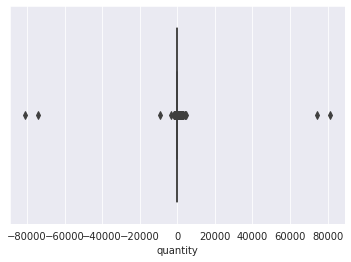

In [34]:
sns.boxplot(data['quantity'])
plt.show()

In [35]:
data[data['quantity'] > 60000]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
61619,541431,23166,medium ceramic top storage jar,74215,2019-01-16 10:01:00,1.04,12346.0
540421,581483,23843,"paper craft , little birdie",80995,2019-12-07 09:15:00,2.08,16446.0


In [36]:
data[data['quantity'] < -60000]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
61624,C541433,23166,medium ceramic top storage jar,-74215,2019-01-16 10:17:00,1.04,12346.0
540422,C581484,23843,"paper craft , little birdie",-80995,2019-12-07 09:27:00,2.08,16446.0


Both orders were canceled in less than 15 minutes, so it won't be smart to consider them in the product range analysis. We'll drop both the order and its cancellation, total of 4 rows: 

In [37]:
display(data.shape[0])
data = data[(data['quantity'] < 60000) & (data['quantity'] > -60000)]
data.shape[0]

534129

534125

We removed these outliers successfully.

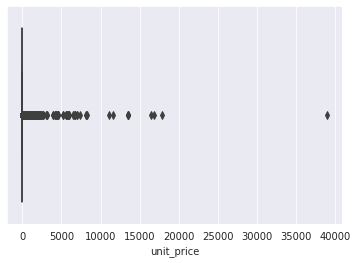

In [38]:
sns.boxplot(data['unit_price'])
plt.show()

In [39]:
data[data['unit_price'] > 30000]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
222681,C556445,M,manual,-1,2019-06-08 15:31:00,38970.0,15098.0


This order isn't about actual product so it won't contribute to the product range analysis. We can drop it:

In [40]:
display(data.shape[0])
data = data[data['unit_price'] < 30000]
data.shape[0]

534125

534124

Let's try to filter out non-products invoices so they won't affect our analysis. We'll add revenue column:

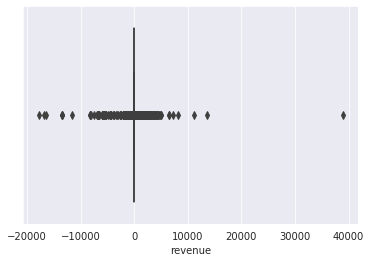

In [41]:
data['revenue']= data['quantity'] * data['unit_price']
sns.boxplot(data['revenue'])
plt.show()

In [42]:
data[(data['revenue'] > 5000) | (data['revenue'] < -5000)]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,revenue
15016,C537630,AMAZONFEE,amazon fee,-1,2018-12-05 15:04:00,13541.33,102030.0,-13541.33
15017,537632,AMAZONFEE,amazon fee,1,2018-12-05 15:08:00,13541.33,102030.0,13541.33
16232,C537644,AMAZONFEE,amazon fee,-1,2018-12-05 15:34:00,13474.79,102030.0,-13474.79
16313,C537647,AMAZONFEE,amazon fee,-1,2018-12-05 15:41:00,5519.25,102030.0,-5519.25
16356,C537651,AMAZONFEE,amazon fee,-1,2018-12-05 15:49:00,13541.33,102030.0,-13541.33
16357,C537652,AMAZONFEE,amazon fee,-1,2018-12-05 15:51:00,6706.71,102030.0,-6706.71
43702,C540117,AMAZONFEE,amazon fee,-1,2019-01-03 09:55:00,16888.02,102030.0,-16888.02
43703,C540118,AMAZONFEE,amazon fee,-1,2019-01-03 09:57:00,16453.71,102030.0,-16453.71
52711,540815,21108,fairy cake flannel assorted colour,3114,2019-01-09 12:55:00,2.10,15749.0,6539.40
96844,C544587,AMAZONFEE,amazon fee,-1,2019-02-19 15:07:00,5575.28,102030.0,-5575.28


We can see some non product that can affect our analysis with high revenue amount. We'll drop them:

In [43]:
to_drop_list = ['amazon fee', 'manual', 'postage', 'dotcom postage', 
                'adjust bad debt', 'discount', 'bank charges', 'samples']
data = data.query('description not in@to_drop_list')
data.shape[0]

531394

<div class="alert alert-success">
Great job here!</div>

We removed the outliers successfully.

### Add new columns (price group, season, day of week, week, month, date)<a class="anchor" id="chapter3.2"></a>

We'll use percentiles to add price group column:

In [44]:
cheapest = np.percentile(data['unit_price'], 25)
cheap = np.percentile(data['unit_price'], 50)
moderate = np.percentile(data['unit_price'], 75)
expensive = np.percentile(data['unit_price'], 95)
very_expensive = np.percentile(data['unit_price'], 99)
def price_group(price):
    if price <= cheapest:
        return 'cheapest'
    if cheapest < price <= cheap:
        return 'cheap'
    if cheap < price <= moderate:
        return 'moderate'
    if moderate < price <= expensive:
        return 'expensive'
    if expensive < price <= very_expensive:
        return 'very expensive'
    return 'most expensive'

data['price_group'] = data['unit_price'].apply(price_group)
data['price_group'].value_counts()

cheapest          162613
moderate          139163
cheap             103952
expensive         102425
very expensive     18175
most expensive      5066
Name: price_group, dtype: int64

Price group column added. We'll add day of the week, week, month, year and date columns:

In [45]:
data['day'] = data['invoice_date'].dt.dayofweek
data['order_week']  = data['invoice_date'].astype('datetime64[W]')
data['order_month'] = data['invoice_date'].astype('datetime64[M]')
data['order_year']  = data['invoice_date'].dt.year
data['order_date'] = data['invoice_date'].dt.date
data.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,revenue,price_group,day,order_week,order_month,order_year,order_date
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850.0,15.30,moderate,3,2018-11-29,2018-11-01,2018,2018-11-29
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850.0,20.34,moderate,3,2018-11-29,2018-11-01,2018,2018-11-29
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850.0,22.00,moderate,3,2018-11-29,2018-11-01,2018,2018-11-29
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17850.0,20.34,moderate,3,2018-11-29,2018-11-01,2018,2018-11-29
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17850.0,20.34,moderate,3,2018-11-29,2018-11-01,2018,2018-11-29


Columns added successfully. Let's add season column:

In [46]:
data['month'] = data['invoice_date'].dt.month
def season(month):
    if month in [3, 4, 5]:
        return 'spring'
    if month in [6, 7, 8]:
        return 'summer'
    if month in [9, 10, 11]:
        return 'autumn'
    if month in [12, 1, 2]:
        return 'winter'    

data['season'] = data['month'].apply(season)
data = data.drop('month', axis=1)
data['season'].value_counts()

autumn    198764
winter    119854
summer    110489
spring    102287
Name: season, dtype: int64

Let's change day from number to a string:

In [47]:
def day_str(day):
    if day == 0:
        return 'Monday'
    if day == 1:
        return 'Tuesday'
    if day == 2:
        return 'Wednesday'
    if day == 3:
        return 'Thursday'
    if day == 4:
        return 'Friday'
    if day == 5:
        return 'Saturday'
    if day == 6:
        return 'Sunday'
data['day'] = data['day'].apply(day_str)
data['day'].value_counts()

Friday       102047
Wednesday     99899
Tuesday       93501
Thursday      92746
Saturday      80533
Monday        62668
Name: day, dtype: int64

We don't have any purchases made on Sunday, assuming Sunday is a day off for the store.

### Study and check general data (time period, number of customers, transactions over the time, etc) <a class="anchor" id="chapter3.3"></a>

* **What period of time does the data cover?**

In [48]:
data['invoice_date'].describe()

count                  531394
unique                  21307
top       2019-10-29 14:41:00
freq                     1113
first     2018-11-29 08:26:00
last      2019-12-07 12:50:00
Name: invoice_date, dtype: object

We can see that the time period is 2018-11-29 to 2019-12-07, let's see if we have complete data for this period:

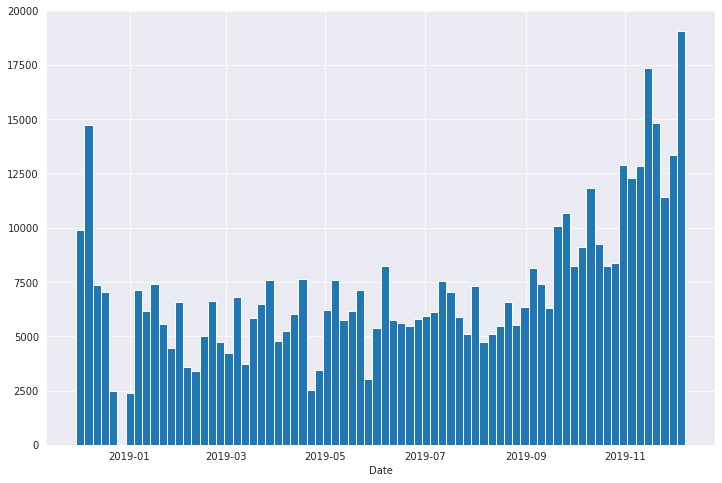

In [49]:
plt.figure(figsize=(12,8))
ax = data['invoice_date'].hist(bins='auto')
ax.set_xlabel('Date')
plt.show()

We have a little gap before 2019-01 but the data is mostly complete.

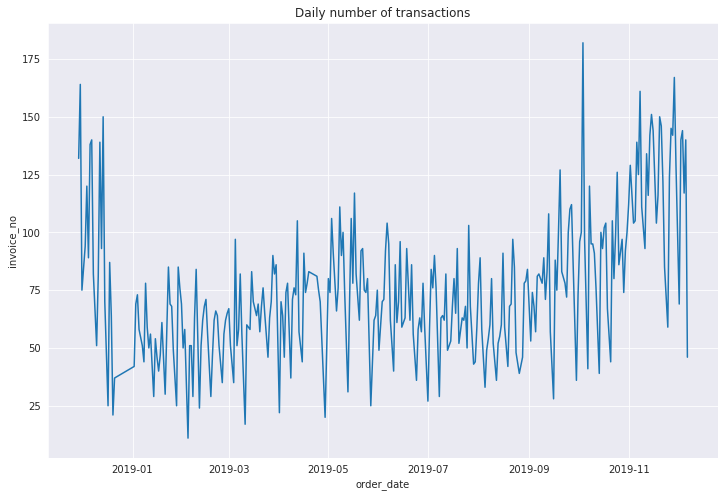

In [50]:
plt.figure(figsize=(12,8))
plt.title('Daily number of transactions')
sns.lineplot(data=data.groupby('order_date')['invoice_no'].nunique().reset_index()
             , x="order_date", y="invoice_no")
plt.show()

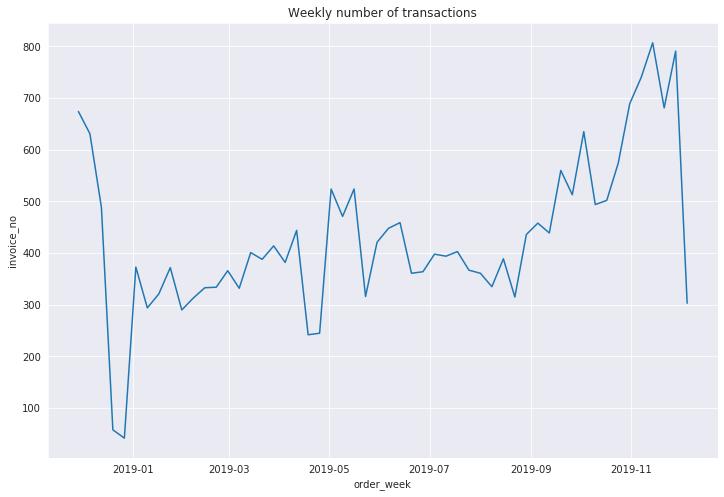

In [51]:
plt.figure(figsize=(12,8))
plt.title('Weekly number of transactions')
sns.lineplot(data=data.groupby('order_week')['invoice_no'].nunique().reset_index()
             , x="order_week", y="invoice_no")
plt.show()

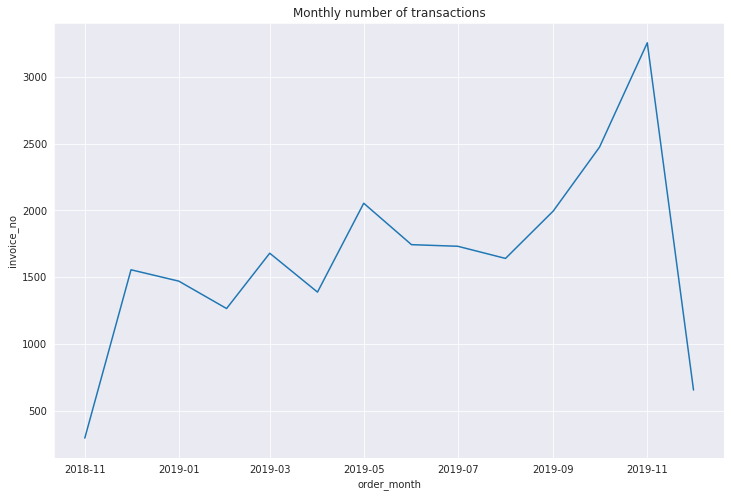

In [52]:
plt.figure(figsize=(12,8))
plt.title('Monthly number of transactions')
sns.lineplot(data=data.groupby('order_month')['invoice_no'].nunique().reset_index()
             , x="order_month", y="invoice_no")
plt.show()

We can see that the days with highest number of transactions were mostly during holiday season September/October/November, which make sense as people make more orders than usual in preparation for the holidays.

* **How many different customers are in the data?**

In [53]:
data[data['customer_id'] != 102030]['customer_id'].nunique()

4361

We have 4361 different customers in addition to the orders without customer_id.

* **How many transactions (invoices) are in the logs?**

In [54]:
data['invoice_no'].nunique()

23210

We have 23210 total transactions in the data.

* **What is the total revenue?**

In [55]:
data['revenue'].sum()

9771056.543

The total revenue is 9771056.543 usd.

* **What is the average revenue per order?**

In [56]:
data.groupby('invoice_no')['revenue'].sum().mean()

420.9847713485567

The average revenue per order is 420.984 usd.

* **What is the total and average monthly revenue per order?**

In [57]:
monthly = data.groupby('order_month')['revenue'].sum().reset_index()
monthly['average'] = monthly['revenue'] / data.groupby('order_month')['invoice_no'].nunique().reset_index()['invoice_no']
monthly

,order_month,revenue,average
0,2018-11-01,103249.920,348.817297
1,2018-12-01,655517.170,421.283528
2,2019-01-01,626963.610,426.215914
3,2019-02-01,494409.010,390.528444
4,2019-03-01,661057.200,393.486429
5,2019-04-01,465828.811,335.369914
6,2019-05-01,775759.960,377.682551
7,2019-06-01,686052.870,393.378939
8,2019-07-01,711411.571,410.745711
9,2019-08-01,731645.530,445.853461


We can see the total revenue and average revenue per order for each month. The total revenue for the holiday season months (September, October, November) is the highest, we confirmed what we found earlier. September has the highest average revenue per order.

* **Which days are most active?**

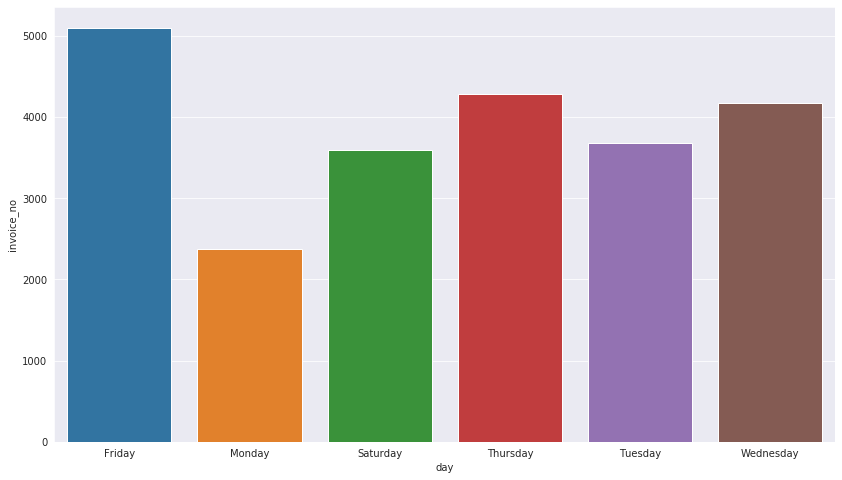

In [58]:
plt.figure(figsize=(14,8))
sns.barplot(x='day', y='invoice_no', data=data.groupby('day')['invoice_no'].nunique().reset_index())
plt.show()

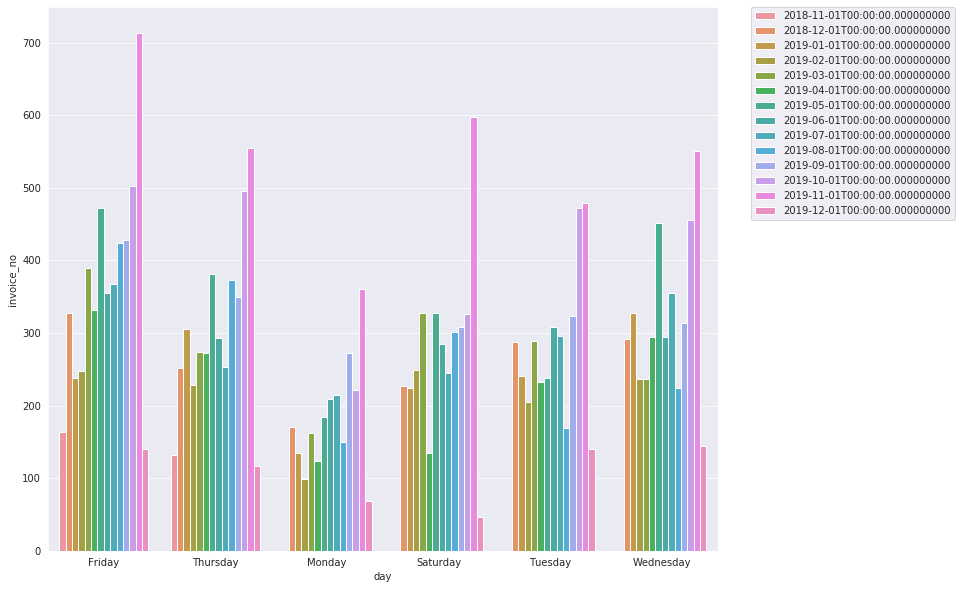

In [59]:
plt.figure(figsize=(12,10))
sns.barplot(x='day', y='invoice_no', data=data.groupby(['order_month', 'day'])['invoice_no'].nunique().reset_index(), hue='order_month')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Friday is the most active day with more than total 5000 transactions madeon fridays, with Wednesday and Thursday with over 4000 transactions each. Fridays of 2019-11 were the most active with over 700 transactions.

* **How many different items are in the data?**

In [60]:
data['stock_code'].nunique()

3928

We have 3928 total items in the data.

* **How many customers made multiple transactions?**

In [61]:
data[data['customer_id'] != 102030].groupby('customer_id')['invoice_no'].nunique().reset_index().sort_values(by='invoice_no', 
                                                                              ascending=False).query('invoice_no > 1')

,customer_id,invoice_no
1890,14911.0,243
327,12748.0,217
4032,17841.0,169
1669,14606.0,125
2187,15311.0,118
...,...,...
4078,17898.0,2
200,12596.0,2
1482,14354.0,2
1599,14512.0,2


There are 3033 customers (We set earlier '102030' as replacement to null so not actual customer) who made at least 2 transactions.

### Add product category<a class="anchor" id="chapter3.4"></a>

In [62]:
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
data['description'] = data['description'].str.replace(".", "")
wordnet_lemma = WordNetLemmatizer()

def lemmatize(text):
    words = nltk.word_tokenize(text)
    return [wordnet_lemma.lemmatize(w) for w in words]
data['lemmatized_words'] = data['description'].apply(lemmatize)
data.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,revenue,price_group,day,order_week,order_month,order_year,order_date,season,lemmatized_words
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850.0,15.30,moderate,Thursday,2018-11-29,2018-11-01,2018,2018-11-29,autumn,"[white, hanging, heart, t-light, holder]"
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850.0,20.34,moderate,Thursday,2018-11-29,2018-11-01,2018,2018-11-29,autumn,"[white, metal, lantern]"
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850.0,22.00,moderate,Thursday,2018-11-29,2018-11-01,2018,2018-11-29,autumn,"[cream, cupid, heart, coat, hanger]"
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17850.0,20.34,moderate,Thursday,2018-11-29,2018-11-01,2018,2018-11-29,autumn,"[knitted, union, flag, hot, water, bottle]"
4,536365,84029E,red woolly hottie white heart,6,2018-11-29 08:26:00,3.39,17850.0,20.34,moderate,Thursday,2018-11-29,2018-11-01,2018,2018-11-29,autumn,"[red, woolly, hottie, white, heart]"


In [64]:
#I set the categories manually using the amount of times each word appeared, uncomment below to see
#frequencies = Counter(word for sentence in data['lemmatized_words'] for word in sentence)
#dict(sorted(frequencies.items(), key=lambda item: item[1], reverse=True))

<div class="alert alert-success">
That's so sweet! </div>

I'll manually set the categories:

In [65]:
vintage = ['vintage', 'antique']
christmas = ['christmas']
decoration = ['decoration', 'candle', 't-light', 'bunting', 'ribbon', 'wall']
kitchen = ['kitchen', 'recipe', 'snack', 'food', 'cake', 'napkin', 'lunch', 'bottle', 'cup', 'mug', 'tea', 'pantry', 'bowl', 
           'cakestand', 'teacup', 'diner', 'picnic', 'sugar', 'tray', 'jug', 'milk', 'biscuit', 'egg', 
           'cutlery', 'jar', 'cream', 'plate', 'chocolate', 'baking', 'jelly', 'oven', 'teatime', 'bread', 
           'dish', 'popcorn', 'pan', 'can', 'pear', 'dinner', 'pot', 'apron', 'saucer', 'cookie', 'coffee',
          'bakelike', 'apple', 'strawberry']
accessories = ['glove', 'ring', 'bag', 'jewellery', 'wallet', 'warmer', 'trinket', 'bracelet', 'fob', 'purse', 'umbrella', 
               'coat']
furniture = ['chest', 'shelf', 'cabinet', 'table', 'drawer', 'seat', 'mirror', 'stand']
home = ['picture', 'hanger', 'rack', 'basket', 'flag', 'scale', 'doormat', 'home', 'towel', 'lantern', 'door', 
        'doorstop', 'cabinet', 'tissue', 'wrap', 'clock', 'storage',  'wicker', 'light', 'cover', 'alarm', 
        'bell', 'tube', 'cushion', 'brush', 'fan', 'harmonica', 'toilet', 'acrylic', 'jigsaw', 'building', 
        'led', 'bath', 'bin', 'board', 'bathroom', 'art', 'parasol', 'sewing', 'magnet', 'photo',
       'chain', 'plaster', 'knob', 'wall', 'frame']
garden = ['garden', 'herb', 'plant', 'tree', 'flower', 'leaf', 'botanical', 'house', 'ornament', 'wreath', 'daisy', 
          'beaker', 'container', 'gardener', 'poppy', 'animal', 'stick', 'garland', 'hook']
office_supplies = ['chalkboard', 'letter', 'pen', 'pencil', 'scissor', 'ruler', 'notebook', 'paper', 'school', 'chalk', 
                   'sketchbook', 'tape', 'marker', 'sticker', 'book', 'cutter', 'slate']
children = ['circus', 'bunny', 'doll', 'balloon', 'childrens','girl', 'dolly', 'toy', 'boy', 'dinosaur', 'child', 
            'magic', 'gift', 'fairy', 'spaceboy', 'party', 'feltcraft', 'gumball', 'playhouse', 'playing', 'ball', 
            'baby', 'game', 'kid', 'treasure', 'rabbit', 'babushka', 'cat', 'owl', 'dog', 'butterfly', 'sweetheart', 
            'bird', 'birthday', 'star']

categories = {
    'furniture' : furniture,
    'vintage': vintage, 
    'christmas' : christmas, 
    'decoration' : decoration,
    'accessories' : accessories,
    'home' : home,
    'garden' : garden,
    'office supplies' : office_supplies,
    'children' : children,
    'kitchen & food' : kitchen
}

def match_category(lemmas):
    for category_list in categories:
        if len(set(lemmas).intersection(set(categories[category_list]))) > 0:
            return category_list
        if category_list == list(categories)[-1]:
            return 'other'
        else:
            continue
            
data['product_category'] = data['lemmatized_words'].apply(match_category)
data['product_category'].value_counts()

home               99198
kitchen & food     74880
accessories        64049
other              60516
decoration         50791
children           48248
vintage            39613
office supplies    30897
garden             27050
christmas          18283
furniture          17869
Name: product_category, dtype: int64

We have our product data divided to 11 product categories that will help us analyze the product range in the next step.

### Separate the data to orders and cancellations<a class="anchor" id="chapter3.5"></a>

We'll separate our data so we can analyze each separately:

In [66]:
cancellations = data.query('quantity < 0')
orders = data.query('quantity > 0')

- We studied quantity and unit_price outliers:
	- We found and removes outliers from our dataset.
- We added new columns:
	- We added the following columns: price group, order day, order week, order month, order year, order date, season.
- We studied and checked general data, we found that:
	- The time period of the dataset is 2018-11-29 to 2019-12-07.
	- The days with highest number of transactions were mostly during holiday season September/October/November.
	- There are 4361 different customers in addition to the orders without customer_id.
	- There are 23210 total transactions in the data.
	- The total revenue is 9771056.543 usd.
	- The average revenue per order is 420.984 usd.
	- The total revenue for the holiday season months (September, October, November) is the highest, September has the highest average revenue per order.
	- Friday is the most active day with more than total 5000 transactions made on fridays.
	- There are 3928 total items in the data.
	- There are 3033 customers who made at least 2 transactions.
- We added product category:
	- We divided the product data to 11 product categories.
- We separated the data to orders and cancellations.

We are ready for the next step, analyzing the product range.

<div class="alert alert-success">
Nothing to add - great job!</div>

# Step 4. Analyzing the product range<a class="anchor" id="chapter4"></a>

### Which products are the best sellers and which are the worst?<a class="anchor" id="chapter4.1"></a>

**By total quantity**

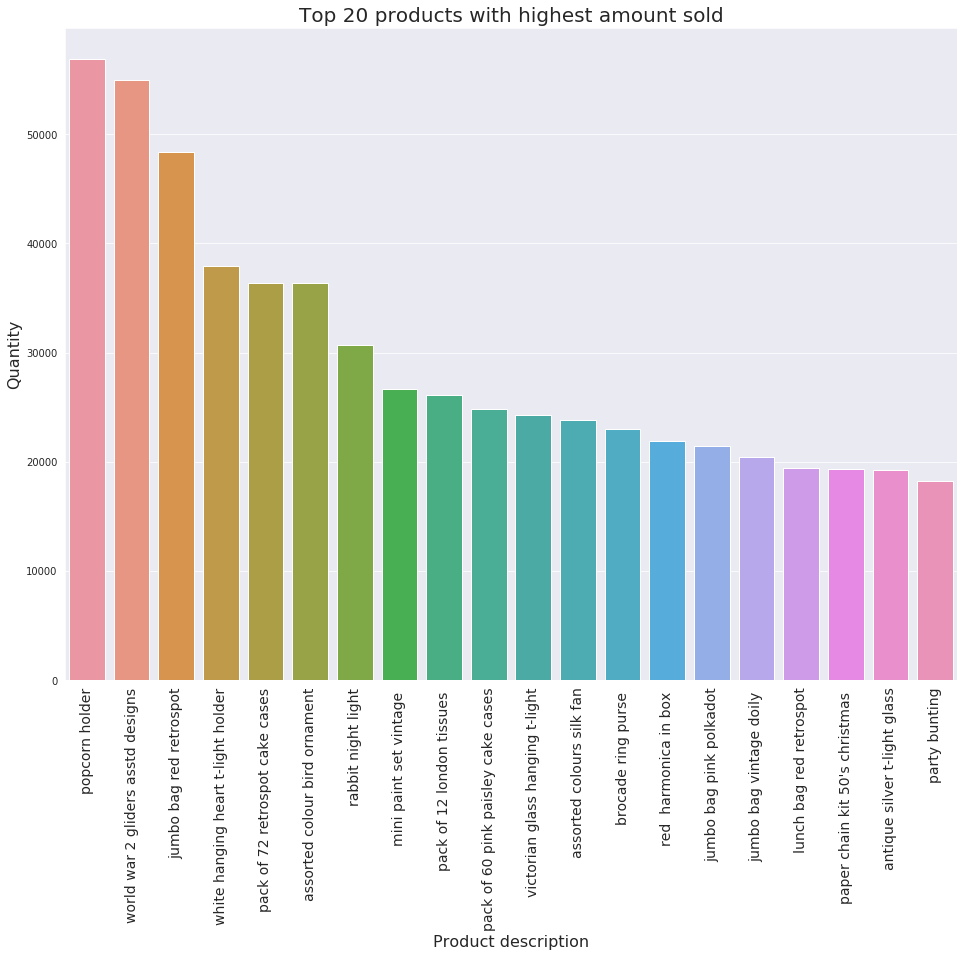

In [67]:
plt.figure(figsize=(16,12))
sns.barplot(x='description', y='quantity', 
            data=orders.groupby('description')['quantity'].sum().reset_index().sort_values(by='quantity', 
                            ascending=False).head(20))
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Product description', size=16)
plt.ylabel('Quantity', size=16)
plt.title('Top 20 products with highest amount sold', size=20)
plt.show()

We have 7 products with sales of more than 30,000 units each. The best seller is 'popcorn holder' with 56898 units, and right next to it we have 'world war 2 gliders asstd designs' with 54951 units sold.

In [68]:
display(orders.groupby('description')['quantity'].sum().reset_index().sort_values(by='quantity', 
                            ascending=True).query('quantity == 1').sample(10))
orders.groupby('description')['quantity'].sum().reset_index().sort_values(by='quantity', 
                            ascending=True).query('quantity == 1').shape[0]

,description,quantity
358,black glass/shell/pearl necklace,1
2144,pack 4 flower/butterfly patches,1
2845,set 10 cards 3 wise men 17107,1
2102,ocean scent candle jewelled drawer,1
568,cake stand lace white,1
1714,keep out girls door hanger,1
1540,haynes camper shoulder bag,1
3346,tea time breakfast basket,1
965,dolphin windmill,1
2847,set 10 cards christmas bauble 16954,1


60

Regarding worst selling individual products, we have 60 products that sold only 1 unit. We have sample of 10 of those above.

**By total amount of orders**

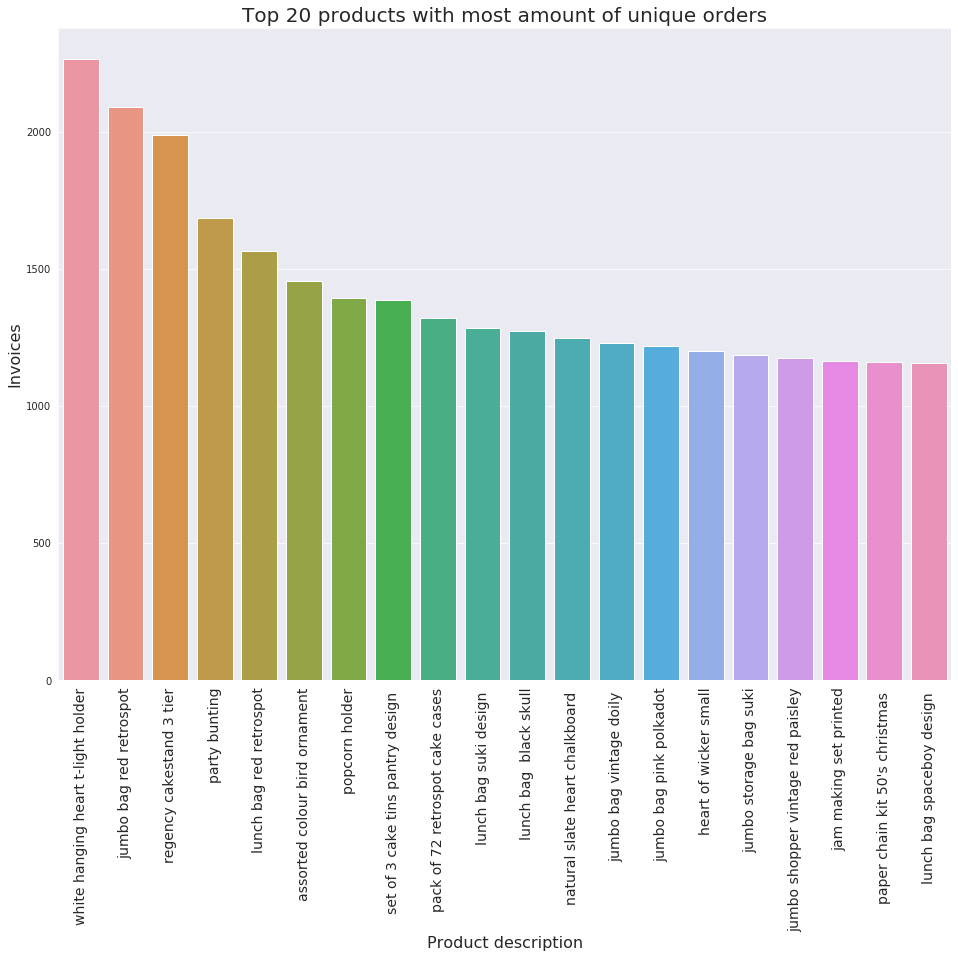

In [69]:
plt.figure(figsize=(16,12))
sns.barplot(x='description', y='invoice_no', 
            data=orders.groupby('description')['invoice_no'].nunique().reset_index().sort_values(by='invoice_no', 
                            ascending=False).head(20))
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Product description', size=16)
plt.ylabel('Invoices', size=16)
plt.title('Top 20 products with most amount of unique orders', size=20)
plt.show()

There are 3 outstanding products with close to or more than 2000 unique orders. The top product is 'white hanging heart t-light holder' with 2265 orders, 'jumbo bag red retrospot' with 2089 orders and 'regency cakestand 3 tier' with 1988 orders.

### Which products are the most profitable?<a class="anchor" id="chapter4.2"></a>

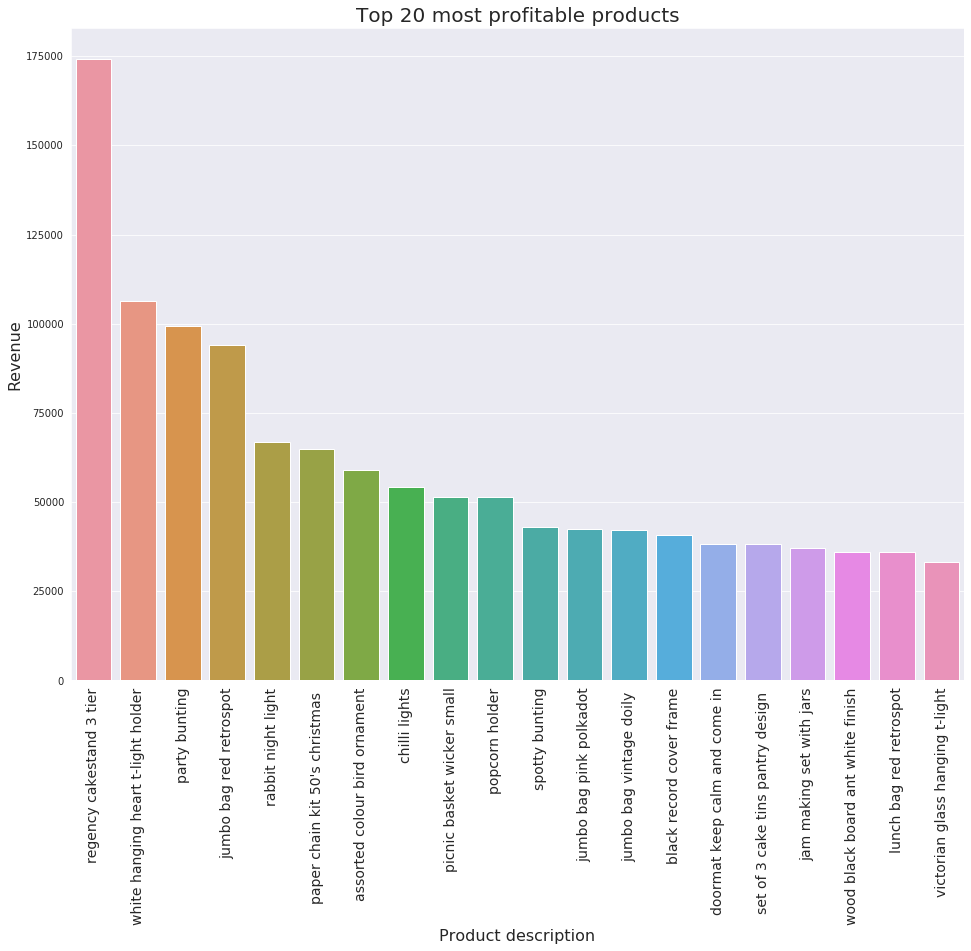

In [70]:
plt.figure(figsize=(16,12))
sns.barplot(x='description', y='revenue', 
            data=orders.groupby('description')['revenue'].sum().reset_index().sort_values(by='revenue', 
                            ascending=False).head(20))
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Product description', size=16)
plt.ylabel('Revenue', size=16)
plt.title('Top 20 most profitable products', size=20)
plt.show()

We can see that 'regency cakestand 3 tier' revenue is by far the highest, \\$174156. There are 4 outstanding products with close to 100k$ revenue, 'regency cakestand 3 tier', 'white hanging heart t-light holder', 'party bunting', 'jumbo bag red retrospot'.

### Which product categories are the most popular?<a class="anchor" id="chapter4.3"></a>

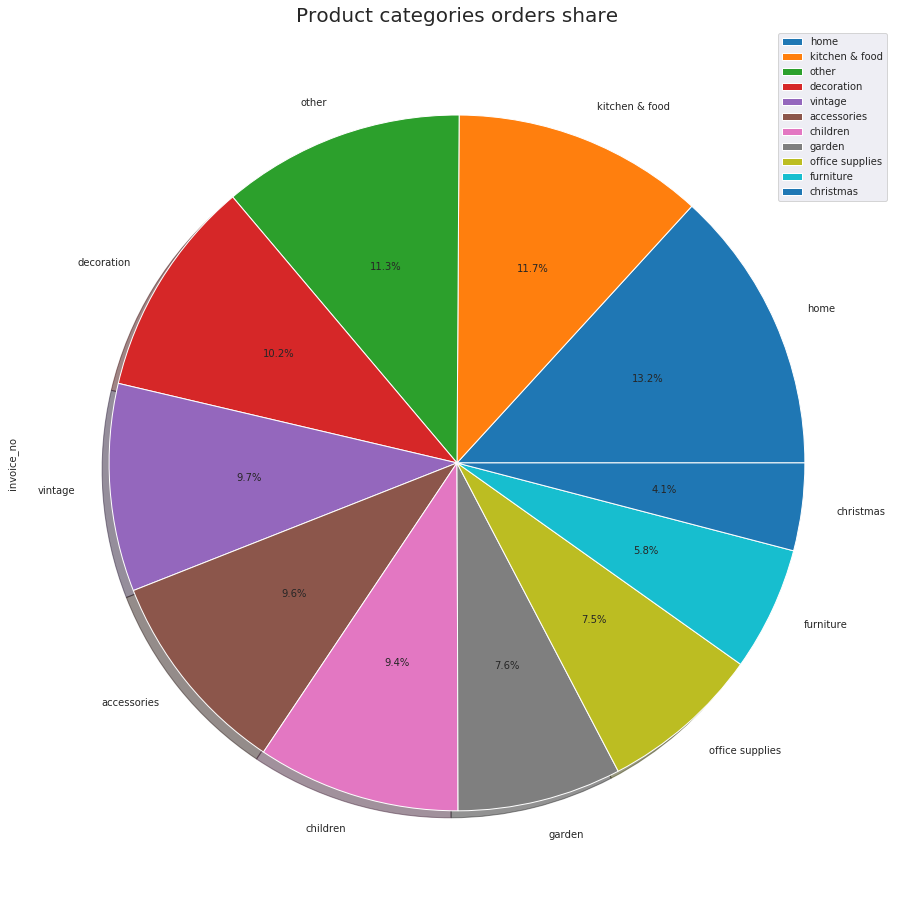

In [71]:
(orders.groupby('product_category')['invoice_no'].nunique().reset_index().sort_values(by='invoice_no', 
            ascending=False).set_index('product_category').plot(y='invoice_no', kind='pie', figsize=(16, 16), 
                                                                autopct='%1.1f%%', shadow=True)
);
plt.title('Product categories orders share', size=20)
plt.show()

Home category has the largest orders share - 13.2%, next is kitchen & food with 11.7%, then other with 11.3%. The worst share categories are christmas and furniture with 4.1% and 5.8%, respectively.

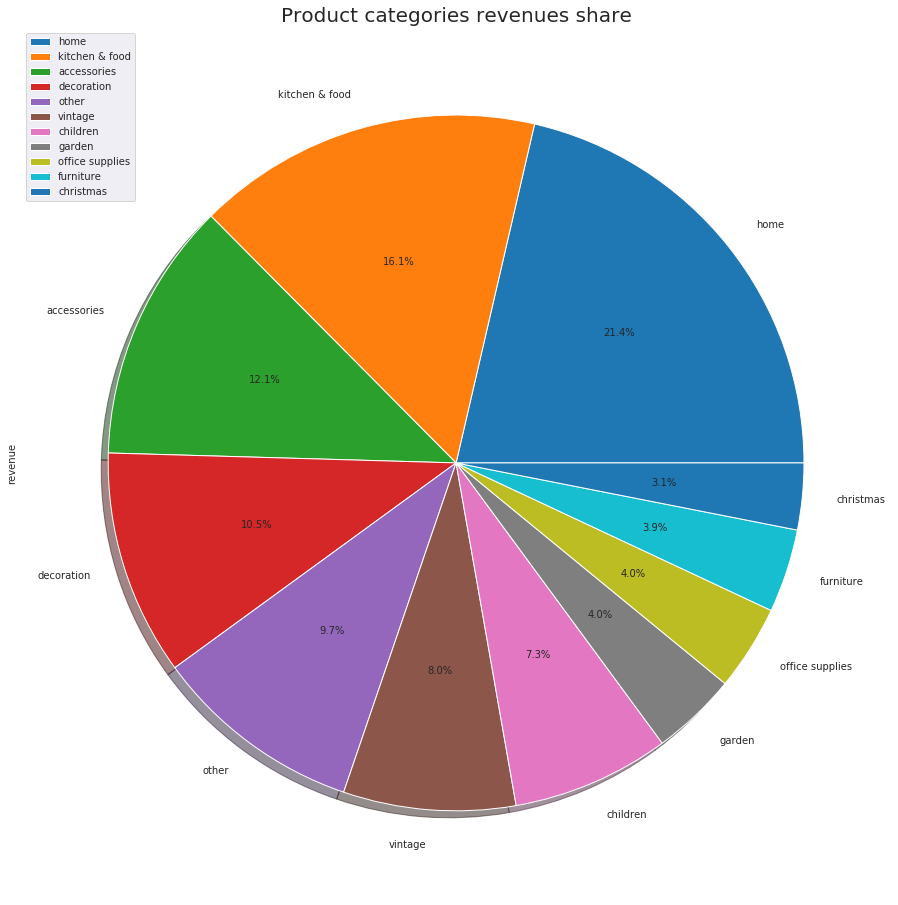

In [72]:
(orders.groupby('product_category')['revenue'].sum().reset_index().sort_values(by='revenue', 
                            ascending=False).set_index('product_category')
                .plot(y='revenue', kind='pie', 
                      figsize=(16, 16), autopct='%1.1f%%', shadow=True)
);
plt.title('Product categories revenues share', size=20)
plt.show()

Home category has the largest revenue share - 21.4%, next is kitchen & food with 16.1%, then accessories with 12.1%. The worst share categories are christmas and furniture with 3.1% and 3.9%, respectively.

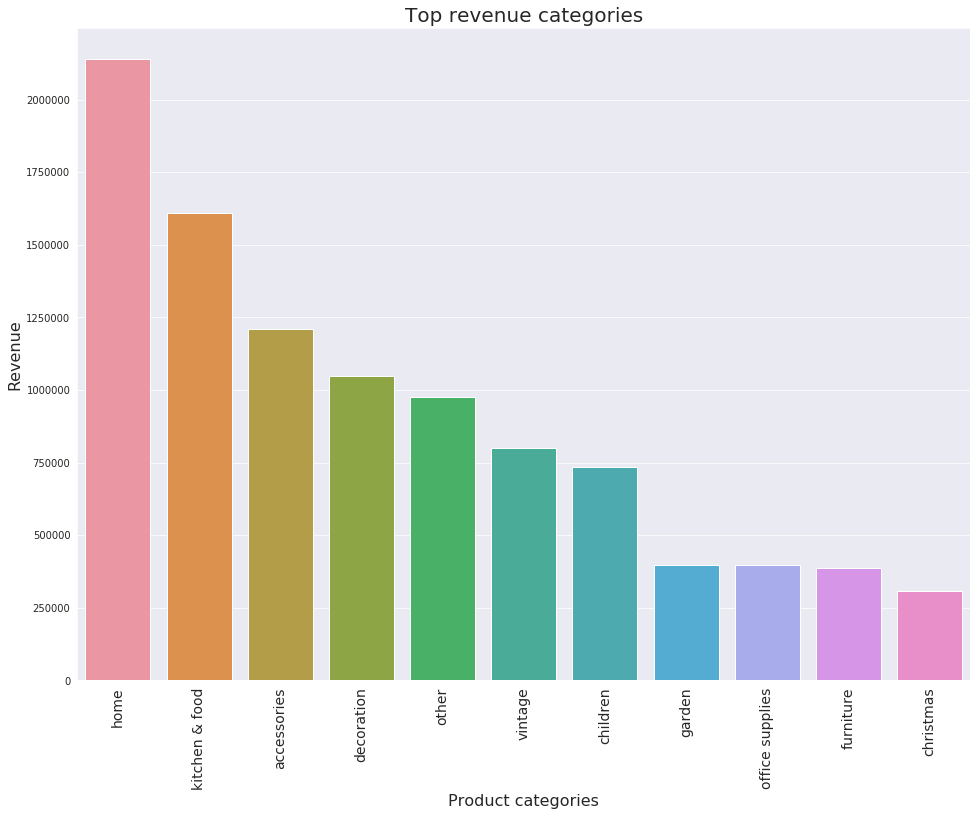

In [73]:
plt.figure(figsize=(16,12))
sns.barplot(x='product_category', y='revenue', 
            data=orders.groupby('product_category')['revenue'].sum().reset_index().sort_values(by='revenue', 
                            ascending=False).head(20))
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Product categories', size=16)
plt.ylabel('Revenue', size=16)
plt.title('Top revenue categories', size=20)
plt.show()

Home revenue is by far the the leader with 2.14m revenues, the next category is kitchen & food with  1.6m revenues. Christmas revenues are the worst - 309k.

### Is there a difference in sales between seasons?<a class="anchor" id="chapter4.4"></a>

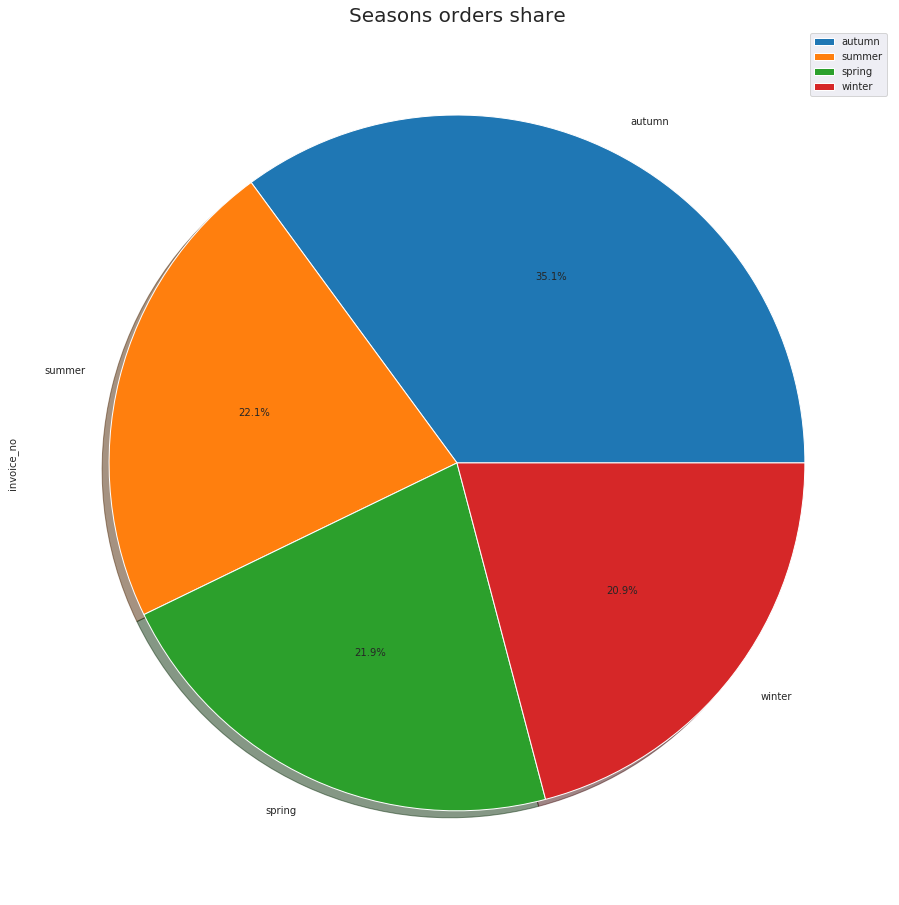

In [74]:
(orders.groupby('season')['invoice_no'].nunique().reset_index().sort_values(by='invoice_no', 
                            ascending=False).reset_index().set_index('season')
                .plot(y='invoice_no', kind='pie', 
                      figsize=(16, 16), autopct='%1.1f%%', shadow=True)
);
plt.title('Seasons orders share', size=20)
plt.show()

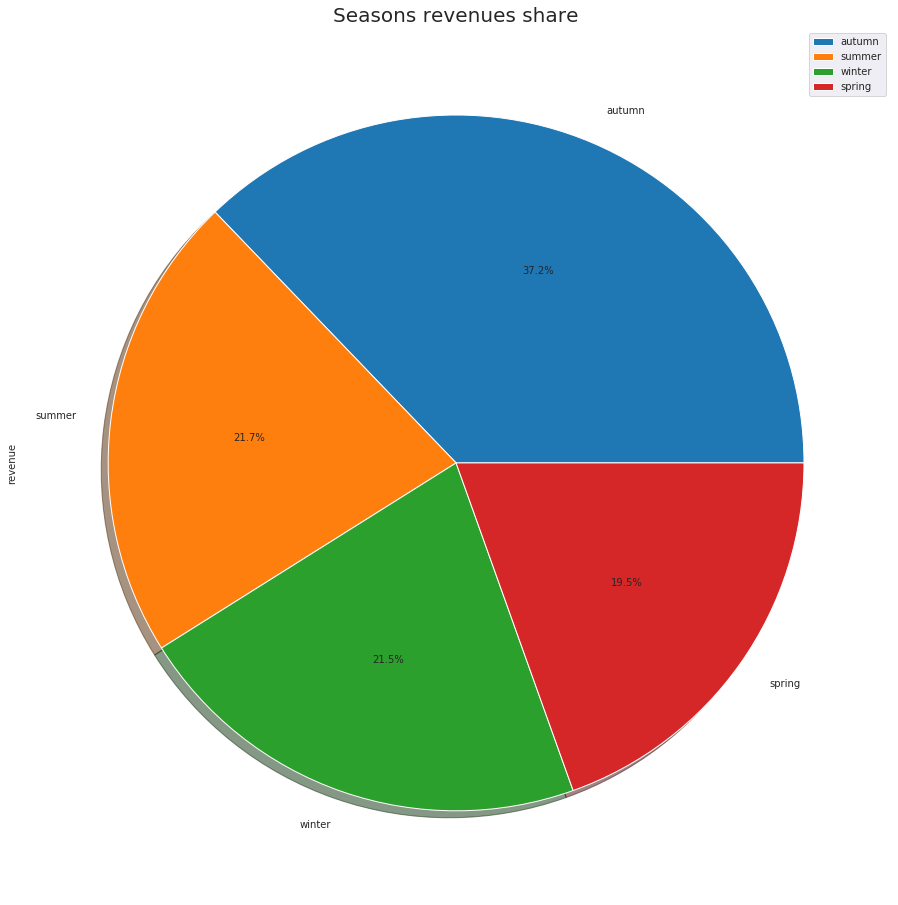

In [75]:
(orders.groupby('season')['revenue'].sum().reset_index().sort_values(by='revenue', 
                            ascending=False).reset_index().set_index('season')
                .plot(y='revenue', kind='pie', 
                      figsize=(16, 16), autopct='%1.1f%%', shadow=True)
);
plt.title('Seasons revenues share', size=20)
plt.show()

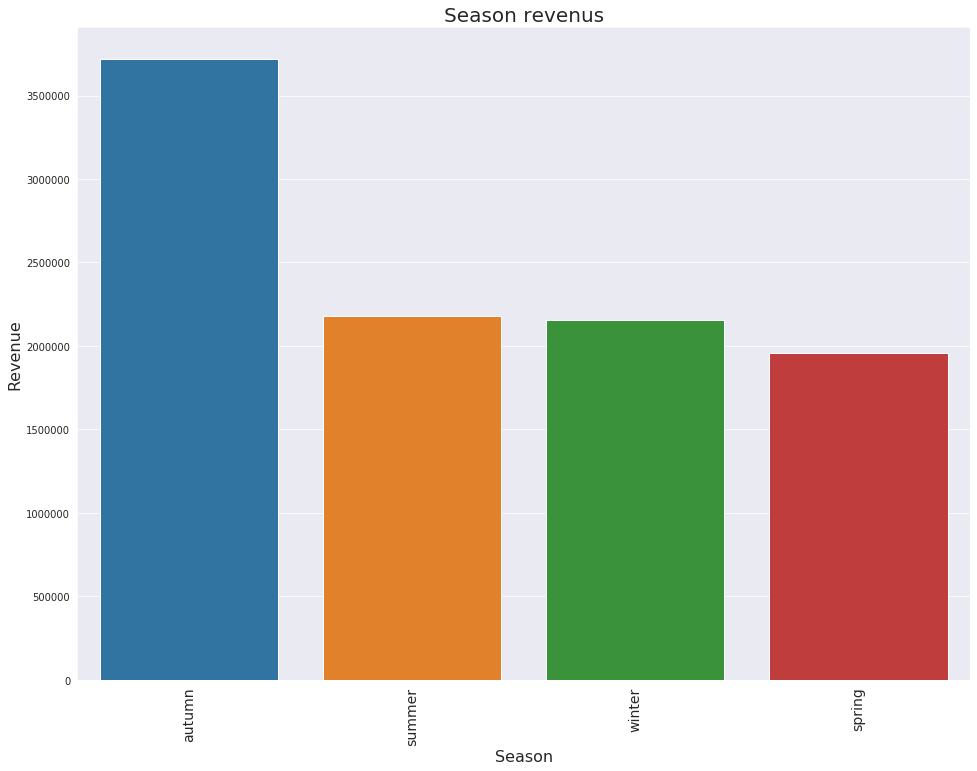

In [76]:
plt.figure(figsize=(16,12))
sns.barplot(x='season', y='revenue', 
            data=orders.groupby('season')['revenue'].sum().reset_index().sort_values(by='revenue', 
                            ascending=False).head(20))
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Season', size=16)
plt.ylabel('Revenue', size=16)
plt.title('Season revenus', size=20)
plt.show()

As we can see, autumn is by the the most profitable season. While rest of the seasons have very similar share and revenues, autumn revenues are 37.2% of the total revenues, almost twice as many as the next season - summer, with 21.7%. We expected such results - we found out that there was a spike in the amount of orders for that time, we suggested that people made extra orders in preparation for the holidays.

<div class="alert alert-success">
So for the seasons it would be also great to check what items were popular in these seasons)</div>

### Which products orders were canceled the most?<a class="anchor" id="chapter4.5"></a>

**By quantity**

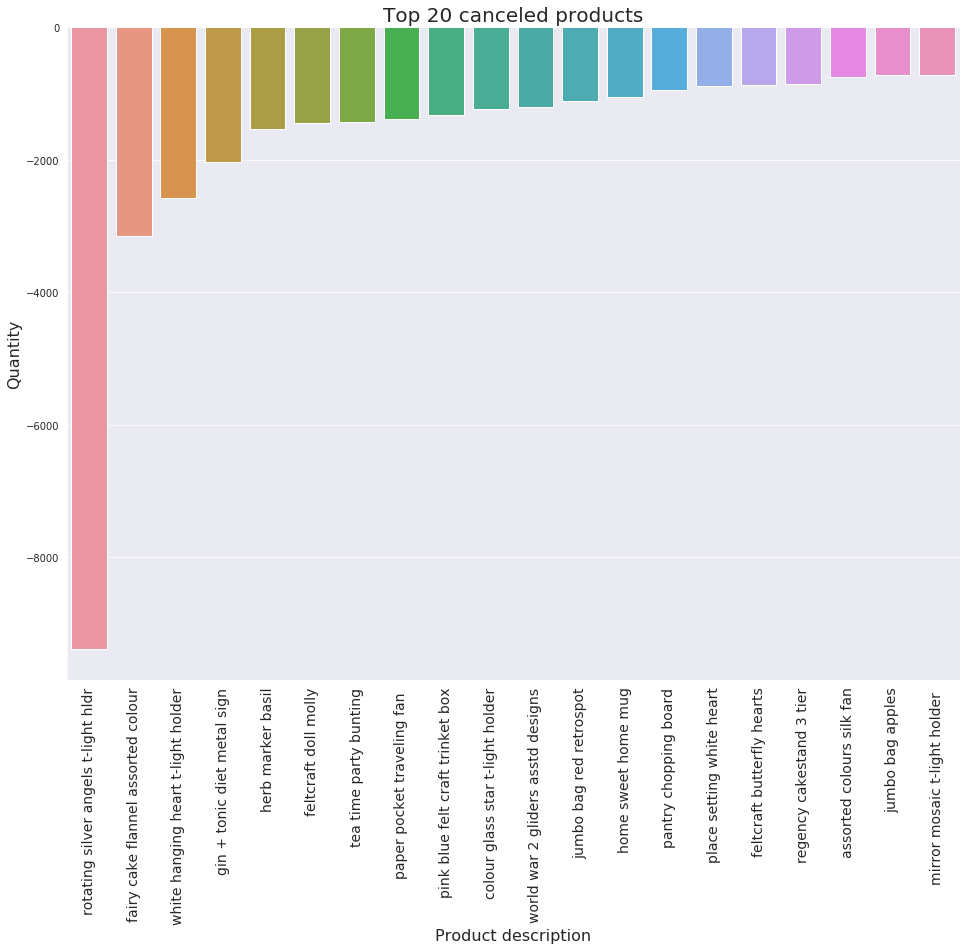

In [77]:
plt.figure(figsize=(16,12))
sns.barplot(x='description', y='quantity', 
            data=cancellations.groupby('description')['quantity'].sum().reset_index().sort_values(by='quantity', 
                            ascending=True).head(20))
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Product description', size=16)
plt.ylabel('Quantity', size=16)
plt.title('Top 20 canceled products', size=20)
plt.show()

The most canceled product by far is 'rotating silver angels t-light hldr' with 9376 units canceled, almost 3 times more than the next product, 'fairy cake flannel assorted colour' with 3150 units canceled.

**By total amount of orders**

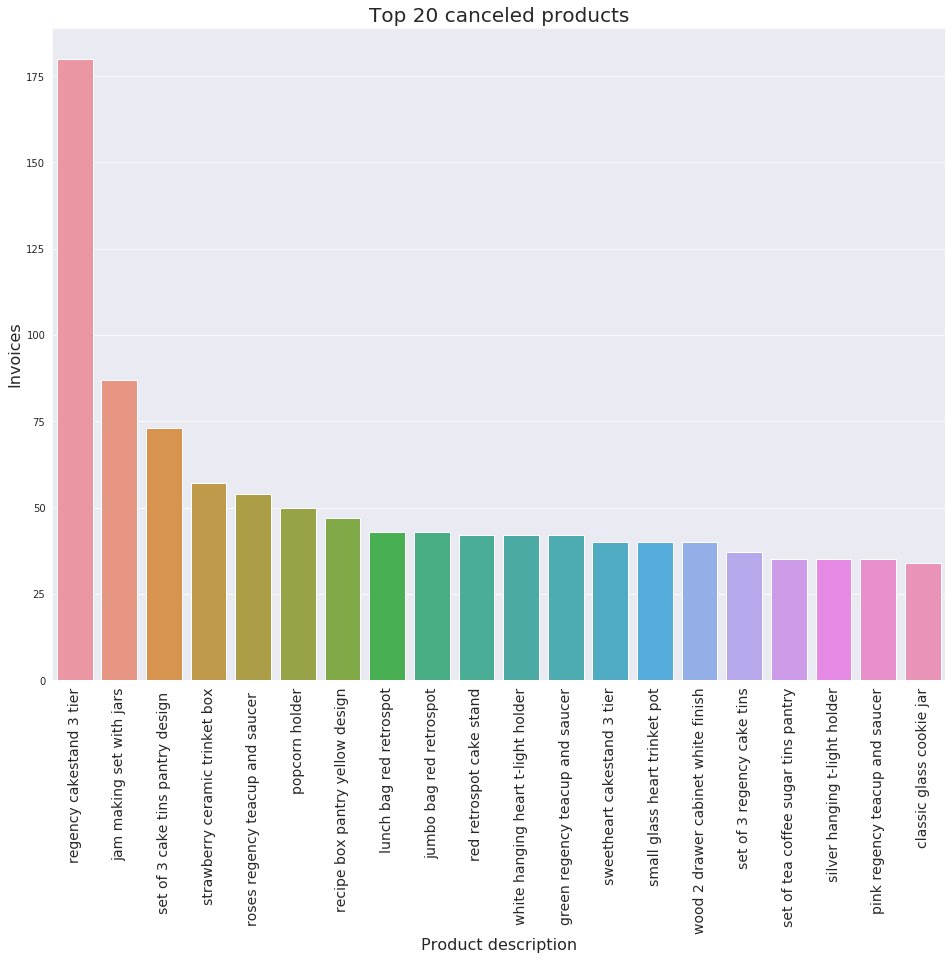

In [78]:
plt.figure(figsize=(16,12))
sns.barplot(x='description', y='invoice_no', 
            data=cancellations.groupby('description')['invoice_no'].nunique().reset_index().sort_values(by='invoice_no', 
                            ascending=False).head(20))
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Product description', size=16)
plt.ylabel('Invoices', size=16)
plt.title('Top 20 canceled products', size=20)
plt.show()

The product with most canceled unique orders by far is 'regency cakestand 3 tier' with 180 orders, 'jam making set with jars' is next with 87 orders.

### Which products are more often sold by themselves, and which are more often combined with others?<a class="anchor" id="chapter4.6"></a>

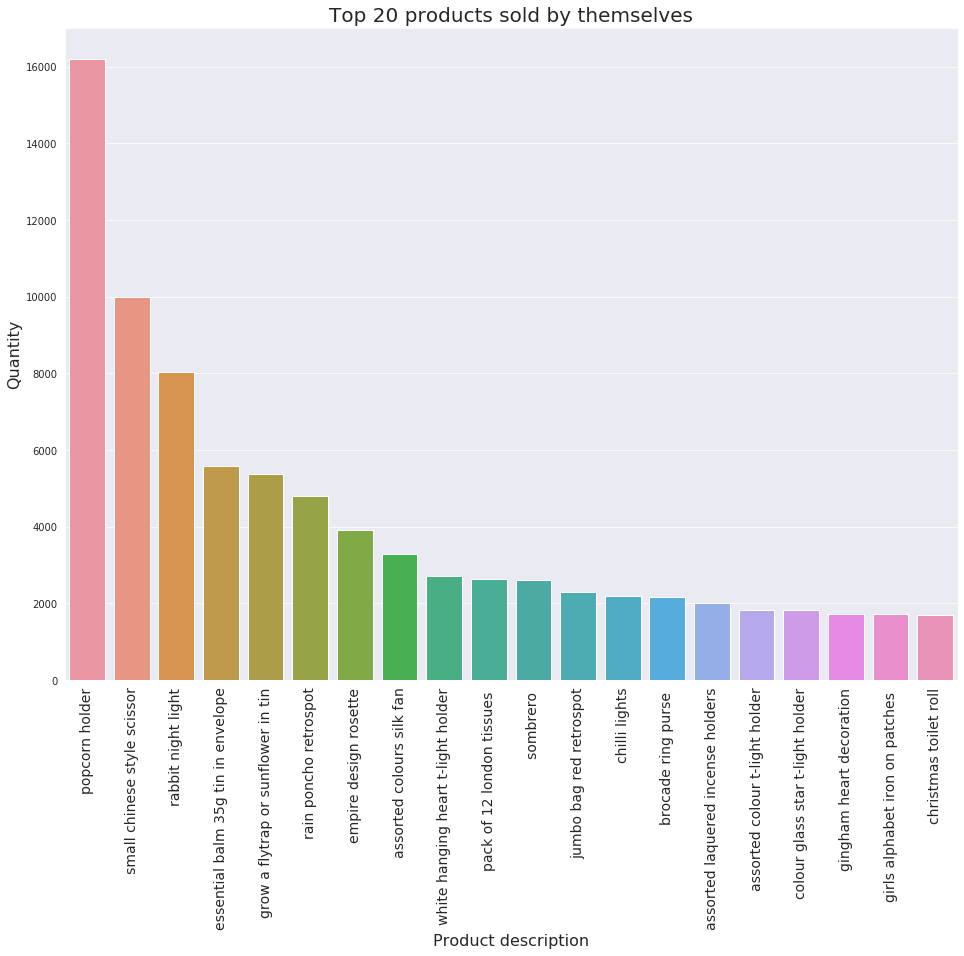

In [79]:
one_stock_code = orders.groupby('invoice_no')['stock_code'].nunique().reset_index().query('stock_code == 1')
plt.figure(figsize=(16,12))
sns.barplot(x='description', y='quantity', 
            data=orders[orders['invoice_no'].isin(one_stock_code['invoice_no'])].groupby('description')['quantity'].sum()\
            .reset_index().sort_values(by='quantity', ascending=False).head(20))
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Product description', size=16)
plt.ylabel('Quantity', size=16)
plt.title('Top 20 products sold by themselves', size=20)
plt.show()

We have 3 standout products that sold by themselves regarding quantity: 'popcorn holder' sold 16208 units, 'small chinese style scissor' sold 10000 units and 'rabbit night light' sold 8024 units.

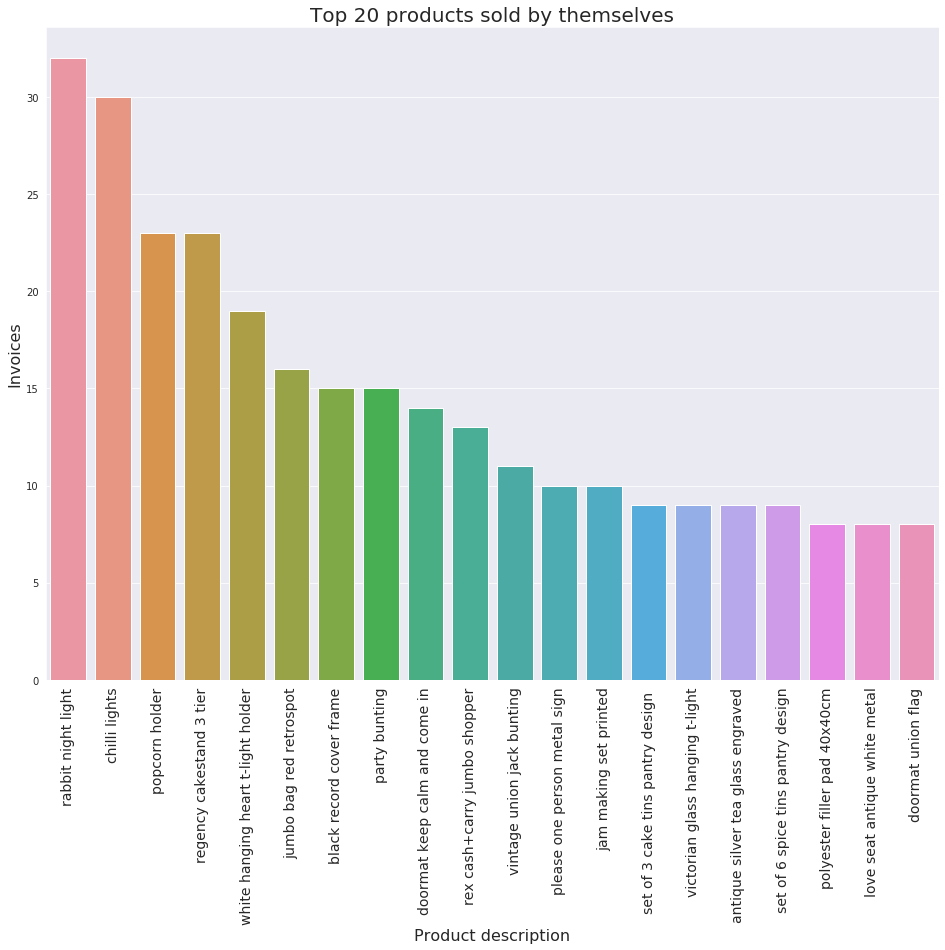

In [80]:
plt.figure(figsize=(16,12))
sns.barplot(x='description', y='invoice_no', 
            data=orders[orders['invoice_no'].isin(one_stock_code['invoice_no'])].groupby('description')['invoice_no']\
            .nunique().reset_index().sort_values(by='invoice_no', ascending=False).head(20))
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Product description', size=16)
plt.ylabel('Invoices', size=16)
plt.title('Top 20 products sold by themselves', size=20)
plt.show()

We have 2 standout products that sold by themselves regarding amount of unique orders: 'rabbit night light' with 32 different orders, 'chilli lights' with 30 different orders. Now let's look at products that more often combined with others:

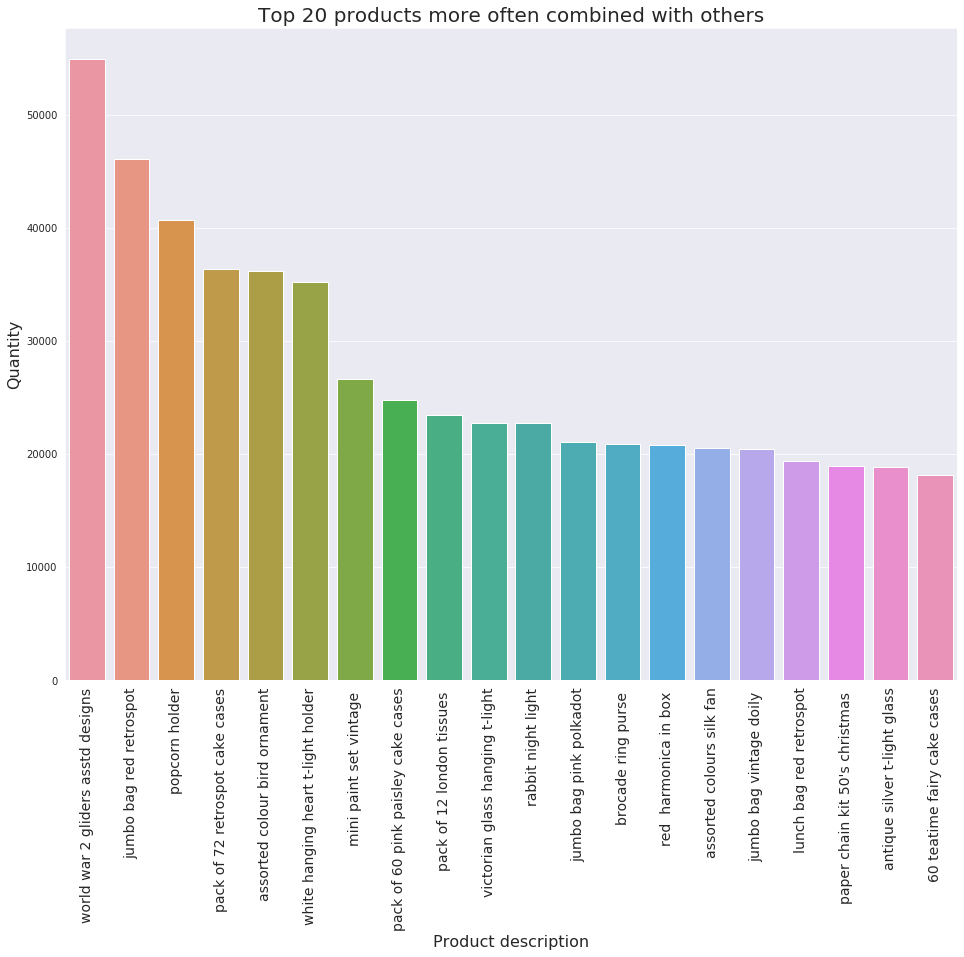

In [81]:
plt.figure(figsize=(16,12))
sns.barplot(x='description', y='quantity', 
            data=orders[~orders['invoice_no'].isin(one_stock_code['invoice_no'])].groupby('description')['quantity'].sum()\
            .reset_index().sort_values(by='quantity', ascending=False).head(20))
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Product description', size=16)
plt.ylabel('Quantity', size=16)
plt.title('Top 20 products more often combined with others', size=20)
plt.show()

We have 6 standout products among products more often combined with others regarding quantity: 'world war 2 gliders asstd designs' sold 54951 units, 'jumbo bag red retrospot' sold 46087 units, 'popcorn holder' sold 40690 units, 'pack of 72 retrospot cake cases' sold 36396 units, 'assorted colour bird ornament' sold 36194 units, 'white hanging heart t-light holder' sold 35213 units.

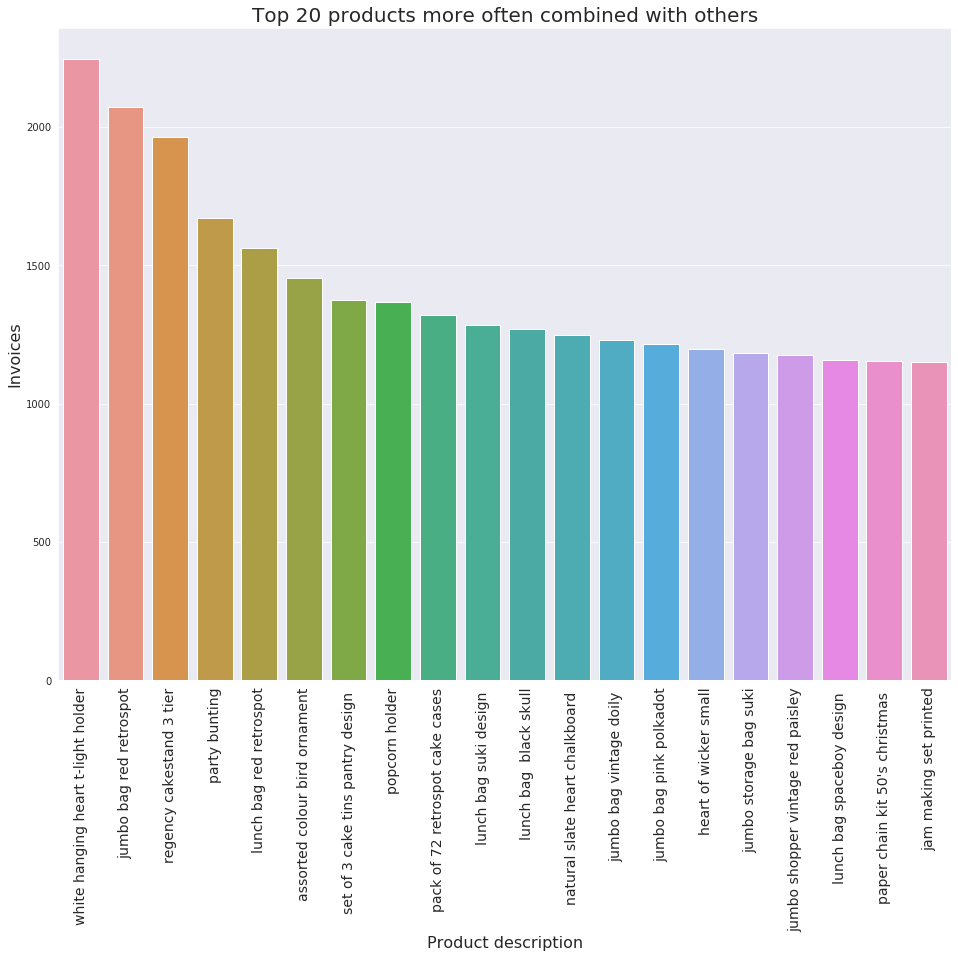

In [82]:
plt.figure(figsize=(16,12))
sns.barplot(x='description', y='invoice_no', 
            data=orders[~orders['invoice_no'].isin(one_stock_code['invoice_no'])].groupby('description')['invoice_no']\
            .nunique().reset_index().sort_values(by='invoice_no', ascending=False).head(20))
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Product description', size=16)
plt.ylabel('Invoices', size=16)
plt.title('Top 20 products more often combined with others', size=20)
plt.show()

We have 3 standout products among products more often combined with others regarding amount of unique orders: 'white hanging heart t-light holder' with 2246 different orders, 'jumbo bag red retrospot' with 2073 different orders, 'regency cakestand 3 tier' with 1965 different orders.

### What bundles of product categories are often present in shopping carts?<a class="anchor" id="chapter4.7"></a>

We'll try to build a correlation matrix in order to find out which bundles of product categories are often present in shopping carts:

In [83]:
bundle_pivot = orders.pivot_table(index = 'invoice_no', columns = 'product_category', values = 'quantity', 
                                aggfunc='sum', fill_value = 0).reset_index()
bundle_pivot

product_category,invoice_no,accessories,children,christmas,decoration,furniture,garden,home,kitchen & food,office supplies,other,vintage
0,536365,8,2,0,12,0,0,12,0,0,6,0
1,536366,12,0,0,0,0,0,0,0,0,0,0
2,536367,0,8,0,0,0,44,10,10,0,6,5
3,536368,9,0,0,0,0,0,0,6,0,0,0
4,536369,0,0,0,0,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19769,581583,40,0,0,0,0,0,0,36,0,0,0
19770,581584,0,0,0,0,0,0,72,48,0,0,0
19771,581585,0,0,0,72,0,40,109,19,14,12,12
19772,581586,0,24,0,0,8,0,10,24,0,0,0


What we can see from the pivot table above is the total quantity of products from each category for each order. We don't need the exact number - what's important is that there is at least 1 product from that category purchased so we could build a correlation matrix. Let's change it:

In [84]:
for column in bundle_pivot:
    if column == 'invoice_no':
        continue
    else:
        bundle_pivot[column] = bundle_pivot[column].apply(lambda x: 1 if x > 0 else 0)
        
bundle_pivot

product_category,invoice_no,accessories,children,christmas,decoration,furniture,garden,home,kitchen & food,office supplies,other,vintage
0,536365,1,1,0,1,0,0,1,0,0,1,0
1,536366,1,0,0,0,0,0,0,0,0,0,0
2,536367,0,1,0,0,0,1,1,1,0,1,1
3,536368,1,0,0,0,0,0,0,1,0,0,0
4,536369,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19769,581583,1,0,0,0,0,0,0,1,0,0,0
19770,581584,0,0,0,0,0,0,1,1,0,0,0
19771,581585,0,0,0,1,0,1,1,1,1,1,1
19772,581586,0,1,0,0,1,0,1,1,0,0,0


The data is ready for the .corr() function:

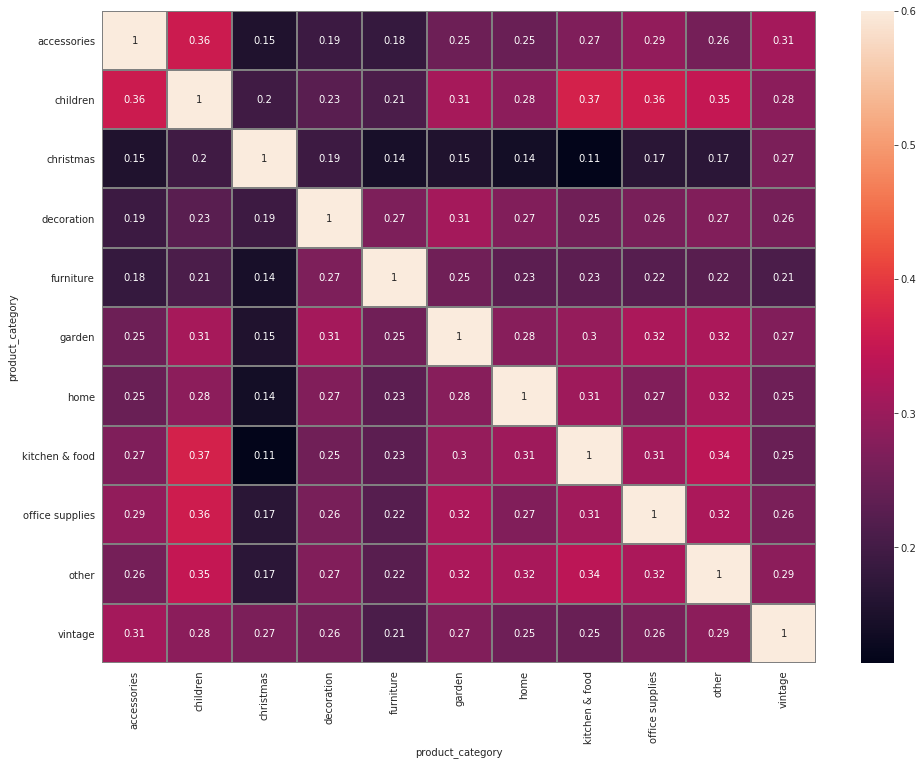

In [85]:
plt.figure(figsize=(16,12))
sns.heatmap(bundle_pivot.corr(), annot=True, linewidths=1, linecolor='gray', vmax = 0.6)
plt.show()

5 bundles of product categories that are often present in shopping carts (the greatest correlations) are:

- 'kitchen & food' & 'children'
- 'children' & 'accessories'
- 'children' & 'office supplies'
- 'other' & 'children'
- 'other' & 'kitchen & food'

<div class="alert alert-success">
Nice job!</div>

# Step 5. Formulate and test statistical hypotheses<a class="anchor" id="chapter5"></a>

We'll test 2 hypotheses.

- Is there a difference between the seasons autumn and summer regarding average revenue per order? 
- Is there a difference between the seasons autumn and summer regarding average quantity per order? 

Let's test the first hypothesis:

**H0**: There is no statistically significant difference between the groups (average revenue is equal).

**H1**: There is a statistically significant difference between the groups (average revenue differs).

In [86]:
sample_1 = orders[orders['season'] == 'autumn'].groupby('invoice_no')['revenue'].sum()
sample_2 = orders[orders['season'] == 'summer'].groupby('invoice_no')['revenue'].sum()

We need to check the distribution of the samples:

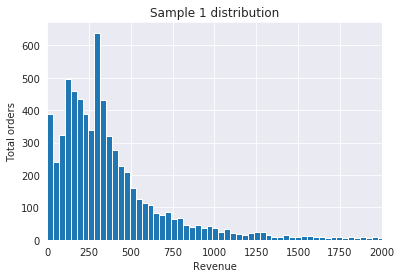

In [87]:
plt.hist(sample_1, bins = 'auto')
plt.xlim(0,2000)
plt.xlabel('Revenue')
plt.ylabel('Total orders')
plt.title('Sample 1 distribution')
plt.show()

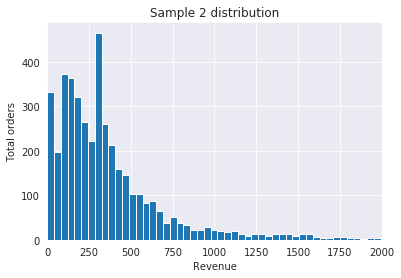

In [88]:
plt.hist(sample_2, bins = 'auto')
plt.xlim(0,2000)
plt.xlabel('Revenue')
plt.ylabel('Total orders')
plt.title('Sample 2 distribution')
plt.show()

The distribution is not normal, we need to use Mann-Whitney test:

In [89]:
alpha = .05
results = st.mannwhitneyu(sample_1, sample_2)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  2.295719199887716e-05
We reject the null hypothesis


**There is a statistically significant difference between the groups (average revenue differs).**

Let's test the second hypothesis:

**H0**: There is no statistically significant difference between the groups (average quantity is equal).

**H1**: There is a statistically significant difference between the groups (average quantity differs).

In [90]:
sample_1 = orders[orders['season'] == 'autumn'].groupby('invoice_no')['quantity'].sum()
sample_2 = orders[orders['season'] == 'summer'].groupby('invoice_no')['quantity'].sum()

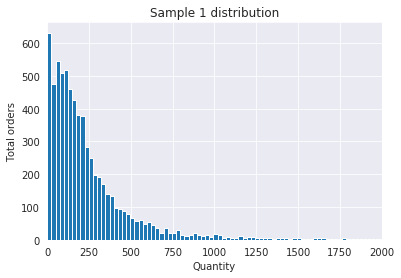

In [91]:
plt.hist(sample_1, bins = 'auto')
plt.xlim(0,2000)
plt.xlabel('Quantity')
plt.ylabel('Total orders')
plt.title('Sample 1 distribution')
plt.show()

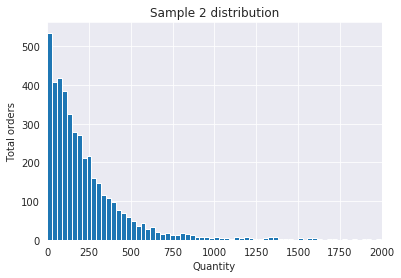

In [92]:
plt.hist(sample_2, bins = 'auto')
plt.xlim(0,2000)
plt.xlabel('Quantity')
plt.ylabel('Total orders')
plt.title('Sample 2 distribution')
plt.show()

In [93]:
alpha = .05
results = st.mannwhitneyu(sample_1, sample_2)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.0005026691756734634
We reject the null hypothesis


**There is a statistically significant difference between the groups (average quantity differs).**

# Step 6. General conclusion<a class="anchor" id="chapter6"></a>

We had dataset that contains the transaction history of an online store that sells household 
goods. Our study goal was to analyze the store product range.

**We opened the data file and read the general information. We found that:**

- There are 541909 rows and 7 columns in the dataset. 
- Regarding data types, we have 4 object, 2 float64 and 1 int64 columns.
- Need to change column names to lowercase and add '_' to make them more readable.
- Need to change description values to lowercase.
- There are 5268 duplicate rows.
- There are missing values in 2 columns: 'CustomerID' and 'Description'.
- Data type of 'InvoiceDate' column should be changed to datetime.
- There are abnormal values in 'Quantity' and 'UnitPrice' columns, should check it later.

**Moving to the data processing step, we fixed the following issues:**

- We removed duplicate rows.
- We changed data type of 'InvoiceDate' column to datetime.
- We changed column names to lowercase and made them more readable.
- Changed description values to lowercase.
- Dealt with missing values in 2 columns: 'CustomerID' and 'Description'.
- Dealt with abnormal unit_price and quantity values.
- Dealt with description differences for the same stock_code.

**Moving to the exploratory data analysis step, we studied the data more:**

- We studied quantity and unit_price outliers:
	- We found and removes outliers from our dataset.
- We added new columns:
	- We added the following columns: price group, order day, order week, order month, order year, order date, season.
- We studied and checked general data, we found that:
	- The time period of the dataset is 2018-11-29 to 2019-12-07.
	- The days with highest number of transactions were mostly during holiday season September/October/November.
	- There are 4361 different customers in addition to the orders without customer_id.
	- There are 23210 total transactions in the data.
	- The total revenue is 9771056.543 usd.
	- The average revenue per order is 420.984 usd.
	- The total revenue for the holiday season months (September, October, November) is the highest, September has the highest average revenue per order.
	- Friday is the most active day with more than total 5000 transactions made on fridays.
	- There are 3928 total items in the data.
	- There are 3033 customers who made at least 2 transactions.
- We added product category:
	- We divided the product data to 11 product categories.
- We separated the data to orders and cancellations.

**Then we analyzed the product range:**

- We have 7 products with sales of more than 30,000 units each. The best seller is 'popcorn holder' with 56898 units, and right next to it we have 'world war 2 gliders asstd designs' with 54951 units sold.
- Regarding worst selling individual products, we have 60 products that sold only 1 unit. 
- There are 3 outstanding products with close to or more than 2000 unique orders. The top product is 'white hanging heart t-light holder' with 2265 orders, 'jumbo bag red retrospot' with 2089 orders and 'regency cakestand 3 tier' with 1988 orders.
- 'regency cakestand 3 tier' revenue is by far the highest, \\$174156. There are 4 outstanding products with close to 100k$ revenue, 'regency cakestand 3 tier', 'white hanging heart t-light holder', 'party bunting', 'jumbo bag red retrospot'.
- Home category has the largest orders share - 13.2%, next is kitchen & food with 11.7%, then other with 11.3%. The worst share categories are christmas and furniture with 4.1% and 5.8%, respectively.
- Home category has the largest revenue share - 21.4%, next is kitchen & food with 16.1%, then accessories with 12.1%. The worst share categories are christmas and furniture with 3.1% and 3.9%, respectively.
- Home category revenue is by far the the leader with 2.14m revenues, the next category is kitchen & food with 1.6m revenues. Christmas revenues are the worst - 309k.
- Autumn is by the the most profitable season. While rest of the seasons have very similar share and revenues, autumn revenues are 37.2% of the total revenues, almost twice as many as the next season - summer, with 21.7%.
- The most canceled product by far is 'rotating silver angels t-light hldr' with 9376 units canceled, almost 3 times more than the next product, 'fairy cake flannel assorted colour' with 3150 units canceled.
- The product with most canceled unique orders by far is 'regency cakestand 3 tier' with 180 orders, 'jam making set with jars' is next with 87 orders.
- We have 3 standout products that sold by themselves regarding quantity: 'popcorn holder' sold 16208 units, 'small chinese style scissor' sold 10000 units and 'rabbit night light' sold 8024 units.
- We have 2 standout products that sold by themselves regarding amount of unique orders: 'rabbit night light' with 32 different orders, 'chilli lights' with 30 different orders. Now let's look at products that more often combined with others:
- We have 6 standout products among products more often combined with others regarding quantity: 'world war 2 gliders asstd designs' sold 54951 units, 'jumbo bag red retrospot' sold 46087 units, 'popcorn holder' sold 40690 units, 'pack of 72 retrospot cake cases' sold 36396 units, 'assorted colour bird ornament' sold 36194 units, 'white hanging heart t-light holder' sold 35213 units.
- We have 3 standout products among products more often combined with others regarding amount of unique orders: 'white hanging heart t-light holder' with 2246 different orders, 'jumbo bag red retrospot' with 2073 different orders, 'regency cakestand 3 tier' with 1965 different orders.
- 5 bundles of product categories that are often present in shopping carts (the greatest correlations) are:
	- 'kitchen & food' & 'children'
    - 'children' & 'accessories'
    - 'children' & 'office supplies'
    - 'other' & 'children'
    - 'other' & 'kitchen & food'

**We formulated and tested statistical hypotheses:**

- Is there a difference between the seasons autumn and summer regarding average revenue per order? 
    - We found that there is a statistically significant difference between the groups (average revenue differs).
- Is there a difference between the seasons autumn and summer regarding average quantity per order?
    - We found that there is a statistically significant difference between the groups (average quantity differs).
    
**Recommendations:**
- We found the most popular bundles of product categories which are often present in shopping carts. It would be smart to offer additional products from those categories when the customer add a product to the cart from matching category.
- We found that autumn is the best season regarding sales, the store could either invest more money in advertising during this time to maximize sales, or invest more money in advertising during rest of the year to increase sales during that time.
- There are 2 product categories that are the leaders in both sales and revenues - 'home' and 'kitchen & food', it would be smart to invest more money in advertising to maximize sales.
- Most customers orders at least 2 different products at time. It would be smart to offer best selling products from high correlated categories in the cart page.
- There are a lot of products that have different descriptions for different orders of the exact same product, which should be fixed.
- There are data regarding postage, amazon fees, 'manual', etc, in addition to data of order cancellations. The data is not organized in a way that it will be easy to filter only the actual order data. The store should take a look at this issue.
- We have missing customer_id, unit_price of 0, and more issues that the store should take a look at.

# Step 7. Sources list<a class="anchor" id="chapter7"></a>

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.pie.html

https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value/22903797

https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html

https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html

# Step 8. Dashboard and presentation<a class="anchor" id="chapter8"></a>

We need to export the order dataframe data for the dashboard:

In [94]:
orders.to_csv('dashboard_data.csv', index = False)

Link for the dashboard:
- https://public.tableau.com/app/profile/matan.w8110/viz/FinalProjectDashboard_16351599537540/Dashboard1?publish=yes 

Link for the presentation:
- https://drive.google.com/file/d/1a9cwQb0iq0My3ld4RFUGLhVWeKNSZh0-/view?usp=sharing

<div class="alert alert-success">
Perfect</div>